# Preprocessing Notebook

Notebook to run through data processing steps using default settings, and save the resulting dataframes for use in the accompanying notebooks

In [1]:
import cellPLATO as cp

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

OVERWRITE_DATAFRAMES = False

Finished running cellPLATO initialization and loaded config.
Initializing:  CellPlatoFigure_20x100x_July20
Hypthesis testing using:  st.ttest_ind
Plots will be exported to:  D://Michael_Shannon/CELLPLATO2022_TESTING/20x_100x_high_temp_res_July20OUTPUT/CellPlatoFigure_20x100x_July20\2022-07-26_10-04-36-602783\plots/
Using unique embedding per dataset shortname:  CellPlatoFigure_20x100x_July20
Exporting static Superplots
Exporting static Plots of Differences
Exporting static Marginal scatterplots
Exporting static Timeplots
Exporting Bar plots
Using corresponding CTL_SHORTLABEL:  WT_20x  for condition:  CAMWT_20x
Dataset in current notebook:  CellPlatoFigure_20x100x_July20
Finished initializing data_processing
Finished intializing visualizations


COND_LIST:  ['CAMWT_20x', 'CAMKO_20x', 'NK92WT_100x', 'NK92KO_100x', 'all']
REP_LIST:  ['Condition_20x_ICAMWT_tracks', 'Condition_20x_ICAMKO_tracks', 'Condition_MAX_WT_100x_mScar_2__tracks', 'Condition_MAX_NK92WT_8__tracks', 'Condition_MAX_NK92WT_6__tracks', 'Condition_MAX_NK92WT_5__tracks', 'Condition_MAX_NK92WT_4__tracks', 'Condition_MAX_NK92WT_3__tracks', 'Condition_MAX_NK92WT_2__tracks', 'Condition_MAX_NK92WT2_7__tracks', 'Condition_MAX_NK92WT2_6__tracks', 'Condition_MAX_NK92WT2_3__tracks', 'Condition_MAX_WT_100x_mScar_8__tracks', 'Condition_MAX_WT_100x_mScar_9__tracks', 'Condition_MAX_NK92KO__tracks', 'Condition_MAX_NK92KO_x_tracks', 'Condition_MAX_NK92KO_7__tracks', 'Condition_MAX_NK92KO_5__tracks', 'Condition_MAX_NK92KO_4__tracks', 'Condition_MAX_NK92KO_3__tracks', 'Condition_MAX_NK92KO_1__tracks', 'Condition_MAX_NK92KO2_6__tracks', 'Condition_MAX_NK92KO2_4__tracks', 'pooled']
Finished initializing cellPLATO


In [2]:
# Get the experiment list from the experiments listed in the config 
exp_list = cp.populate_experiment_list()
display(exp_list)

Condition                             Experiment  \
0     CAMWT_20x            Condition_20x_ICAMWT_tracks   
1     CAMKO_20x            Condition_20x_ICAMKO_tracks   
2   NK92WT_100x  Condition_MAX_WT_100x_mScar_2__tracks   
3   NK92WT_100x         Condition_MAX_NK92WT_8__tracks   
4   NK92WT_100x         Condition_MAX_NK92WT_6__tracks   
5   NK92WT_100x         Condition_MAX_NK92WT_5__tracks   
6   NK92WT_100x         Condition_MAX_NK92WT_4__tracks   
7   NK92WT_100x         Condition_MAX_NK92WT_3__tracks   
8   NK92WT_100x         Condition_MAX_NK92WT_2__tracks   
9   NK92WT_100x        Condition_MAX_NK92WT2_7__tracks   
10  NK92WT_100x        Condition_MAX_NK92WT2_6__tracks   
11  NK92WT_100x        Condition_MAX_NK92WT2_3__tracks   
12  NK92WT_100x  Condition_MAX_WT_100x_mScar_8__tracks   
13  NK92WT_100x  Condition_MAX_WT_100x_mScar_9__tracks   
14  NK92KO_100x           Condition_MAX_NK92KO__tracks   
15  NK92KO_100x          Condition_MAX_NK92KO_x_tracks   
16  NK92KO_100x         Condition_MAX_NK92KO_7__tracks   
17  NK92KO_100x         Condition_MAX_NK92KO_5__tracks   
18  NK92KO_100x         Condition_MAX_NK92KO_4__tracks   
19  NK92KO_100x         Condition_MAX_NK92KO_3__tracks   
20  NK92KO_100x         Condition_MAX_NK92KO_1__tracks   
21  NK92KO_100x        Condition_MAX_NK92KO2_6__tracks   
22  NK92KO_100x        Condition_MAX_NK92KO2_4__tracks   

                             Replicate_ID Condition_shortlabel  \
0             Condition_20x_ICAMWT_tracks               WT_20x   
1             Condition_20x_ICAMKO_tracks               KO_20x   
2   Condition_MAX_WT_100x_mScar_2__tracks              WT_100x   
3          Condition_MAX_NK92WT_8__tracks              WT_100x   
4          Condition_MAX_NK92WT_6__tracks              WT_100x   
5          Condition_MAX_NK92WT_5__tracks              WT_100x   
6          Condition_MAX_NK92WT_4__tracks              WT_100x   
7          Condition_MAX_NK92WT_3__tracks              WT_100x   
8          Condition_MAX_NK92WT_2__tracks              WT_100x   
9         Condition_MAX_NK92WT2_7__tracks              WT_100x   
10        Condition_MAX_NK92WT2_6__tracks              WT_100x   
11        Condition_MAX_NK92WT2_3__tracks              WT_100x   
12  Condition_MAX_WT_100x_mScar_8__tracks              WT_100x   
13  Condition_MAX_WT_100x_mScar_9__tracks              WT_100x   
14           Condition_MAX_NK92KO__tracks              KO_100x   
15          Condition_MAX_NK92KO_x_tracks              KO_100x   
16         Condition_MAX_NK92KO_7__tracks              KO_100x   
17         Condition_MAX_NK92KO_5__tracks              KO_100x   
18         Condition_MAX_NK92KO_4__tracks              KO_100x   
19         Condition_MAX_NK92KO_3__tracks              KO_100x   
20         Condition_MAX_NK92KO_1__tracks              KO_100x   
21        Condition_MAX_NK92KO2_6__tracks              KO_100x   
22        Condition_MAX_NK92KO2_4__tracks              KO_100x   

   Replicate_shortlabel  
0              WT_20x_0  
1              KO_20x_0  
2             WT_100x_9  
3             WT_100x_8  
4             WT_100x_7  
5             WT_100x_6  
6             WT_100x_5  
7             WT_100x_4  
8             WT_100x_3  
9             WT_100x_2  
10            WT_100x_1  
11            WT_100x_0  
12           WT_100x_10  
13           WT_100x_11  
14            KO_100x_8  
15            KO_100x_7  
16            KO_100x_6  
17            KO_100x_5  
18            KO_100x_4  
19            KO_100x_3  
20            KO_100x_2  
21            KO_100x_1  
22            KO_100x_0

In [3]:
# Load, process and combine the dataframes (including segmentation and migration calculations)
comb_df = cp.combine_dataframes(exp_list)

----
['CAMWT_20x', 'CAMKO_20x', 'NK92WT_100x', 'NK92KO_100x']
['WT_20x', 'KO_20x', 'WT_100x', 'KO_100x']
[CAMWT_20x, CAMKO_20x, NK92WT_100x, NK92KO_100x]
Categories (4, object): [CAMWT_20x, CAMKO_20x, NK92WT_100x, NK92KO_100x]
---
0    Condition_20x_ICAMWT_tracks
Name: Experiment, dtype: object
h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (437663, 11)
coords:  (437663, 5)
0 CAMWT_20x 0.537
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input posit

100%|█████████████████████████████████████████████████████████████████████████████| 4989/4989 [01:54<00:00, 43.64it/s]


Saving file: Z://Collaboration_data/Mace_Lab/20x_100x/20x_100x_high_temp_res\CAMWT_20x\Condition_20x_ICAMWT_tracks\seg_mig_calcs.csv
1    Condition_20x_ICAMKO_tracks
Name: Experiment, dtype: object
h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (761064, 11)
coords:  (761064, 5)
1 CAMKO_20x 0.537
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccen

  0%|                                                                                       | 0/11167 [00:00<?, ?it/s]

Processing migration_calcs() for condition:  CAMKO_20x
Processing migration_calcs() for experiment:  Condition_20x_ICAMKO_tracks


100%|███████████████████████████████████████████████████████████████████████████| 11167/11167 [03:35<00:00, 51.72it/s]


Saving file: Z://Collaboration_data/Mace_Lab/20x_100x/20x_100x_high_temp_res\CAMKO_20x\Condition_20x_ICAMKO_tracks\seg_mig_calcs.csv


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 62.50it/s]

2     WT_100x_mScar_2
3            NK92WT_8
4            NK92WT_5
5            NK92WT_4
6            NK92WT_3
7            NK92WT_2
8           NK92WT2_7
9           NK92WT2_6
10          NK92WT2_3
11             NK92WT
12    WT_100x_mScar_8
13    WT_100x_mScar_9
Name: Experiment, dtype: object
h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (120, 11)
coords:  (120, 5)
2 NK92WT_100x 0.107
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame

Saving file: Z://Collaboration_data/Mace_Lab/20x_100x/20x_100x_high_temp_res\NK92WT_100x\WT_100x_mScar_2\seg_mig_calcs.csv


100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 63.06it/s]

h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (389, 11)
coords:  (389, 5)
2 NK92WT_100x 0.107
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccentricity', 'equivalent_diameter', 'extent', 'filled_area',
       'major_axis_length', 'minor_axis_length', 'orientation', 'perimeter',
       'solidity', 'Condition', 'Replicate_ID', 'Cond_label', 'Rep_

Saving file: Z://Collaboration_data/Mace_Lab/20x_100x/20x_100x_high_temp_res\NK92WT_100x\NK92WT_8\seg_mig_calcs.csv


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31.27it/s]

h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (120, 11)
coords:  (120, 5)
2 NK92WT_100x 0.107
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccentricity', 'equivalent_diameter', 'extent', 'filled_area',
       'major_axis_length', 'minor_axis_length', 'orientation', 'perimeter',
       'solidity', 'Condition', 'Replicate_ID', 'Cond_label', 'Rep_label',
       'x_um', 'y


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31.19it/s]

h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (120, 11)
coords:  (120, 5)
2 NK92WT_100x 0.107
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccentricity', 'equivalent_diameter', 'extent', 'filled_area',
       'major_axis_length', 'minor_axis_length', 'orientation', 'perimeter',
       'solidity', 'Condition', 'Replicate_ID', 'Cond_label', 'Rep_label',
       'x_um', 'y


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31.25it/s]

h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (120, 11)
coords:  (120, 5)
2 NK92WT_100x 0.107
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccentricity', 'equivalent_diameter', 'extent', 'filled_area',
       'major_axis_length', 'minor_axis_length', 'orientation', 'perimeter',
       'solidity', 'Condition', 'Replicate_ID', 'Cond_label', 'Rep_label',
       'x_um', 'y


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 76.93it/s]

h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (49, 11)
coords:  (49, 5)
2 NK92WT_100x 0.107
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccentricity', 'equivalent_diameter', 'extent', 'filled_area',
       'major_axis_length', 'minor_axis_length', 'orientation', 'perimeter',
       'solidity', 'Condition', 'Replicate_ID', 'Cond_label', 'Rep_label',
       'x_um', 'y_u


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.26it/s]

h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (120, 11)
coords:  (120, 5)
2 NK92WT_100x 0.107
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccentricity', 'equivalent_diameter', 'extent', 'filled_area',
       'major_axis_length', 'minor_axis_length', 'orientation', 'perimeter',
       'solidity', 'Condition', 'Replicate_ID', 'Cond_label', 'Rep_label',
       'x_um', 'y


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 74.63it/s]

h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (247, 11)
coords:  (247, 5)
2 NK92WT_100x 0.107
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccentricity', 'equivalent_diameter', 'extent', 'filled_area',
       'major_axis_length', 'minor_axis_length', 'orientation', 'perimeter',
       'solidity', 'Condition', 'Replicate_ID', 'Cond_label', 'Rep_label',
       'x_um', 'y


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.26it/s]

h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (120, 11)
coords:  (120, 5)
2 NK92WT_100x 0.107
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccentricity', 'equivalent_diameter', 'extent', 'filled_area',
       'major_axis_length', 'minor_axis_length', 'orientation', 'perimeter',
       'solidity', 'Condition', 'Replicate_ID', 'Cond_label', 'Rep_label',
       'x_um', 'y


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31.25it/s]

h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (120, 11)
coords:  (120, 5)
2 NK92WT_100x 0.107
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccentricity', 'equivalent_diameter', 'extent', 'filled_area',
       'major_axis_length', 'minor_axis_length', 'orientation', 'perimeter',
       'solidity', 'Condition', 'Replicate_ID', 'Cond_label', 'Rep_label',
       'x_um', 'y


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 60.61it/s]

h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (124, 11)
coords:  (124, 5)
2 NK92WT_100x 0.107
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccentricity', 'equivalent_diameter', 'extent', 'filled_area',
       'major_axis_length', 'minor_axis_length', 'orientation', 'perimeter',
       'solidity', 'Condition', 'Replicate_ID', 'Cond_label', 'Rep_label',
       'x_um', 'y


100%|██████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 116.28it/s]

h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (153, 11)
coords:  (153, 5)
2 NK92WT_100x 0.107
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccentricity', 'equivalent_diameter', 'extent', 'filled_area',
       'major_axis_length', 'minor_axis_length', 'orientation', 'perimeter',
       'solidity', 'Condition', 'Replicate_ID', 'Cond_label', 'Rep_


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 30.30it/s]

14     NK92KO_x
15     NK92KO_7
16     NK92KO_5
17     NK92KO_4
18     NK92KO_3
19     NK92KO_1
20    NK92KO2_6
21    NK92KO2_4
22       NK92KO
Name: Experiment, dtype: object
h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (120, 11)
coords:  (120, 5)
3 NK92KO_100x 0.107
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccentricity', 'equivalent_diameter', 'extent', 'filled_


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 69.44it/s]

h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (264, 11)
coords:  (264, 5)
3 NK92KO_100x 0.107
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccentricity', 'equivalent_diameter', 'extent', 'filled_area',
       'major_axis_length', 'minor_axis_length', 'orientation', 'perimeter',
       'solidity', 'Condition', 'Replicate_ID', 'Cond_label', 'Rep_

100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 29.41it/s]

h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (120, 11)
coords:  (120, 5)
3 NK92KO_100x 0.107
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccentricity', 'equivalent_diameter', 'extent', 'filled_area',
       'major_axis_length', 'minor_axis_length', 'orientation', 'perimeter',
       'solidity', 'Condition', 'Replicate_ID', 'Cond_label', 'Rep_label',
       'x_um', 'y


100%|██████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 152.17it/s]

h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (150, 11)
coords:  (150, 5)
3 NK92KO_100x 0.107
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccentricity', 'equivalent_diameter', 'extent', 'filled_area',
       'major_axis_length', 'minor_axis_length', 'orientation', 'perimeter',
       'solidity', 'Condition', 'Replicate_ID', 'Cond_label', 'Rep_


100%|███████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 31.25it/s]

h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (240, 11)
coords:  (240, 5)
3 NK92KO_100x 0.107
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccentricity', 'equivalent_diameter', 'extent', 'filled_area',
       'major_axis_length', 'minor_axis_length', 'orientation', 'perimeter',
       'solidity', 'Condition', 'Replicate_ID', 'Cond_label', 'Rep_label',
       'x_um', 'y


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 32.26it/s]

h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (120, 11)
coords:  (120, 5)
3 NK92KO_100x 0.107
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccentricity', 'equivalent_diameter', 'extent', 'filled_area',
       'major_axis_length', 'minor_axis_length', 'orientation', 'perimeter',
       'solidity', 'Condition', 'Replicate_ID', 'Cond_label', 'Rep_label',
       'x_um', 'y


100%|████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 129.87it/s]

h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (271, 11)
coords:  (271, 5)
3 NK92KO_100x 0.107
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccentricity', 'equivalent_diameter', 'extent', 'filled_area',
       'major_axis_length', 'minor_axis_length', 'orientation', 'perimeter',
       'solidity', 'Condition', 'Replicate_ID', 'Cond_label', 'Rep_


100%|████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 131.30it/s]

h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (360, 11)
coords:  (360, 5)
3 NK92KO_100x 0.107
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccentricity', 'equivalent_diameter', 'extent', 'filled_area',
       'major_axis_length', 'minor_axis_length', 'orientation', 'perimeter',
       'solidity', 'Condition', 'Replicate_ID', 'Cond_label', 'Rep_

Saving file: Z://Collaboration_data/Mace_Lab/20x_100x/20x_100x_high_temp_res\NK92KO_100x\NK92KO2_4\seg_mig_calcs.csv


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 31.25it/s]

h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (119, 11)
coords:  (119, 5)
3 NK92KO_100x 0.107
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccentricity', 'equivalent_diameter', 'extent', 'filled_area',
       'major_axis_length', 'minor_axis_length', 'orientation', 'perimeter',
       'solidity', 'Condition', 'Replicate_ID', 'Cond_label', 'Rep_label',
       'x_um', 'y

max x_pix:  1022.3125 , image width:  1024
max y_pix:  1022.1304321289062 , image height:  1024
max x_um:  548.9818125 , MICRONS_PER_PIXEL:  0.107
max y_um:  548.8840420532227 , MICRONS_PER_PIXEL:  0.107


In [4]:
comb_df = cp.measurement_pipeline(comb_df)

Calculating ripleys p, K and L with radius:  25  (pixels)
Calibrating with mixed_scaling =  True
Using mixed_calibration.
CAMWT_20x 0.537 0.016666666666666666
CAMKO_20x 0.537 0.016666666666666666
NK92WT_100x 0.107 0.016666666666666666
NK92KO_100x 0.107 0.016666666666666666


In [ ]:
# Returns a filtered dataframe, while also adding included column to comb_df
comb_df, filt_counts = cp.apply_filters(comb_df)


In [5]:
# Process a time-averaged DataFrame
tavg_df = cp.time_average(comb_df)
display(tavg_df)

Cond_label    Condition Condition_shortlabel       MSD  Rep_label  \
0        CAMWT_20x    CAMWT_20x               WT_20x  0.062310        0.0   
1        CAMWT_20x    CAMWT_20x               WT_20x  0.066585        0.0   
2        CAMWT_20x    CAMWT_20x               WT_20x  0.057600        0.0   
3        CAMWT_20x    CAMWT_20x               WT_20x  0.113291        0.0   
4        CAMWT_20x    CAMWT_20x               WT_20x  0.048824        0.0   
...            ...          ...                  ...       ...        ...   
15887  NK92KO_100x  NK92KO_100x              KO_100x  0.254249       21.0   
15888  NK92KO_100x  NK92KO_100x              KO_100x  0.151851       21.0   
15889  NK92KO_100x  NK92KO_100x              KO_100x  0.161359       21.0   
15890  NK92KO_100x  NK92KO_100x              KO_100x  0.067173       21.0   
15891  NK92KO_100x  NK92KO_100x              KO_100x  0.059227       22.0   

                      Replicate_ID Replicate_shortlabel        _        area  \
0      Condition_20x_ICAMWT_tracks             WT_20x_0  0.00000  248.843369   
1      Condition_20x_ICAMWT_tracks             WT_20x_0  0.00000  175.874573   
2      Condition_20x_ICAMWT_tracks             WT_20x_0  0.00000  181.448883   
3      Condition_20x_ICAMWT_tracks             WT_20x_0  0.00000   70.133148   
4      Condition_20x_ICAMWT_tracks             WT_20x_0  0.00000  168.854813   
...                            ...                  ...      ...         ...   
15887                    NK92KO2_4            KO_100x_7  0.00000  286.923401   
15888                    NK92KO2_4            KO_100x_7  0.00000  290.741302   
15889                    NK92KO2_4            KO_100x_7  0.03125  304.237122   
15890                    NK92KO2_4            KO_100x_7  0.00000  180.138565   
15891                       NK92KO            KO_100x_8  0.00000  397.953400   

       arrest_coefficient  ...  turn_angle        uniq_id  unique_id  \
0                0.997013  ...   -3.143857            inf        0.0   
1                0.997199  ...   -2.787234            inf        1.0   
2                0.997349  ...    1.411370            inf        2.0   
3                0.993830  ...    1.300673            inf        3.0   
4                0.999495  ...   -1.498908            inf        4.0   
...                   ...  ...         ...            ...        ...   
15887            1.000000  ...  -27.341115   1.096095e+05    15887.0   
15888            1.000000  ...   -5.566527  6.206503e+133    15888.0   
15889            1.000000  ...  -22.600198  6.597535e+125    15889.0   
15890            1.000000  ...   -7.889581   2.112000e+03    15890.0   
15891            1.000000  ...    2.313164            inf    15891.0   

                x       x_pix        x_um           y       y_pix       y_um  \
0      480.314640  480.314640  257.928962   20.107899   20.107899  10.797942   
1      997.558980  997.558980  535.689172   20.735702   20.735702  11.135072   
2      633.371408  633.371408  340.120446   19.053602   19.053602  10.231784   
3      522.862362  522.862362  280.777089   25.941807   25.941807  13.930750   
4       10.658516   10.658516    5.723623   25.649865   25.649865  13.773978   
...           ...         ...         ...         ...         ...        ...   
15887  415.961380  415.961380   44.507868  497.854019  497.854019  53.270380   
15888  428.255510  428.255510   45.823340  640.980072  640.980072  68.584868   
15889  381.270966  381.270966   40.795993  486.813790  486.813790  52.089076   
15890  412.935425  412.935425   44.184090  430.355225  430.355225  46.048009   
15891  514.238517  514.238517   55.023521  390.748847  390.748847  41.810127   

              z  
0      0.000000  
1      0.000000  
2      0.000000  
3      0.000000  
4      0.000000  
...         ...  
15887  0.000000  
15888  0.000000  
15889  0.024624  
15890  0.000000  
15891  0.000000  

[15892 rows x 48 columns]

In [6]:
# Make summary calculations from time-averaged dataframe
#Per condition:
avg_df = cp.average_per_condition(tavg_df)

# Per replicate
repavg_df = cp.average_per_condition(tavg_df, avg_per_rep=True)

In [7]:
# Dimension reduction pipeline
dr_df = cp.dr_pipeline(comb_df, dr_factors=cp.DR_FACTORS) 

Running dr_pipeline...
tSNE perplexity =  185
UMAP nearest neighbors =  10  min distance =  0.5
Using standardized factors for dimensionality reduction, matrix shape:  (1117936, 28)
Using openTSNE with perplexity =  185
Using openTSNE to calculate new embedding for input data.
Embedding shape:  (1117936, 2)


In [8]:
# Clustering cell behavior
lab_dr_df = cp.hdbscan_clustering(dr_df, cluster_by=cp.CLUSTER_BY, plot=False)

hdbscan_clustering() with min_cluster_size =  20
DBScan clustering by UMAP...


In [9]:
# Run the trajectory clustering pipeline
lab_dr_df, traj_list, cluster_lst = cp.trajectory_clustering_pipeline(lab_dr_df, traj_factor='umap', dist_metric='hausdorff', filename_out='std_dr_df_traj')

Defining trajectories using: ( UMAP1 UMAP2 )
Completed distance matrix, shape:  (5163, 5163)
Determined maximum number of clusters where eps =   2.0


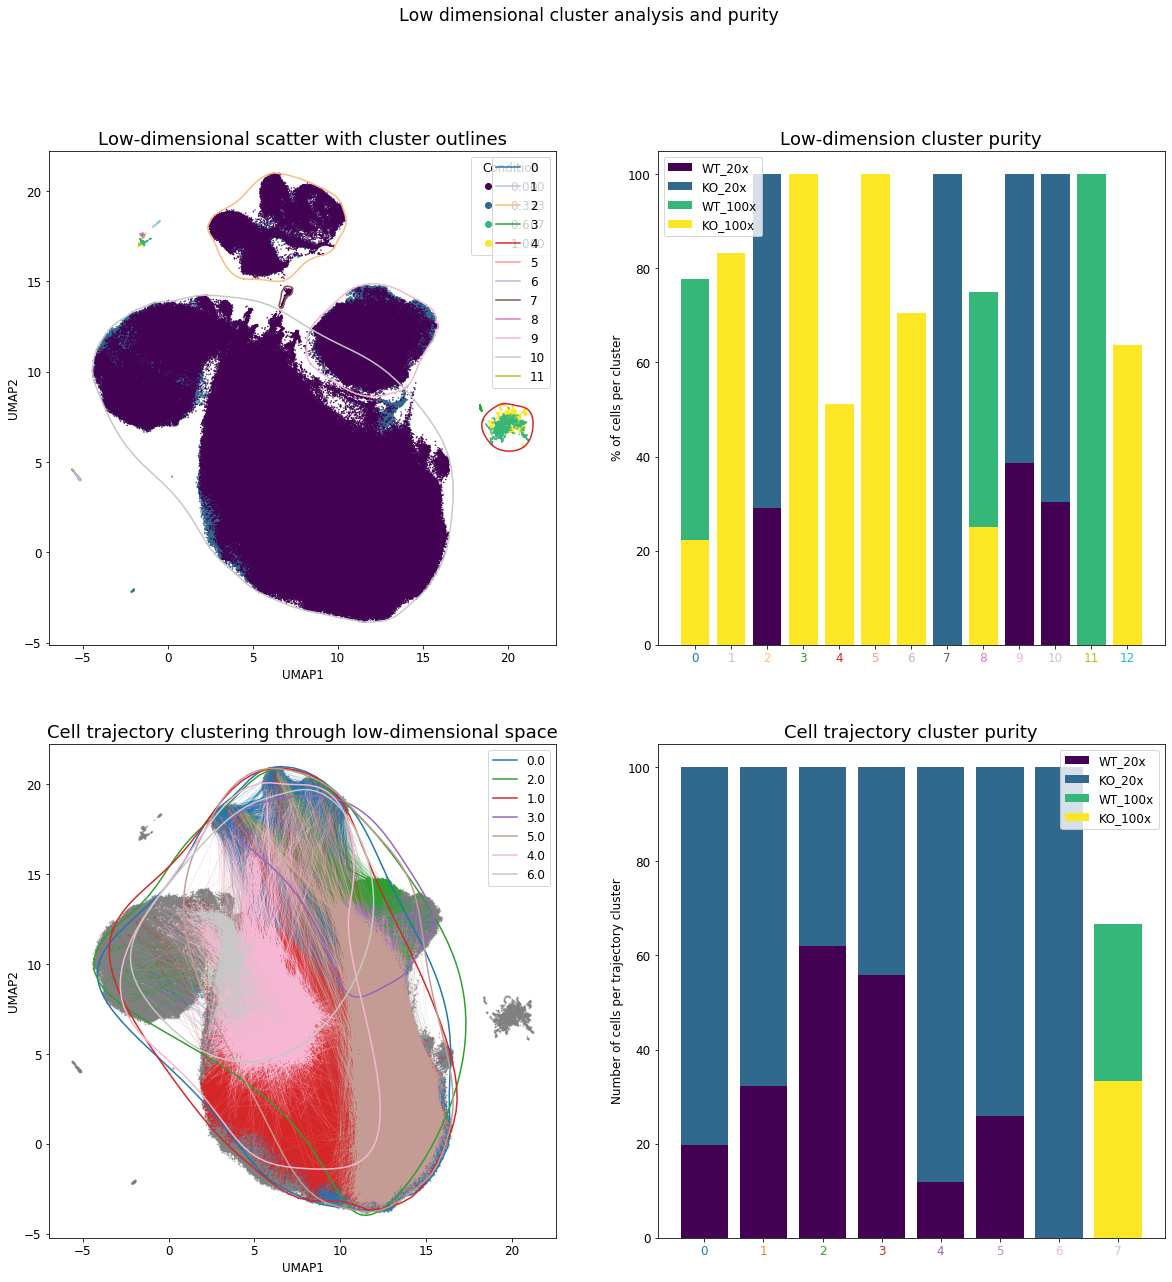

In [10]:
cp.cluster_switching_pipeline(lab_dr_df)

In [17]:
if OVERWRITE_DATAFRAMES:
    # Save dataframes to shared data folder
    tavg_df.to_csv(cp.SAVED_DATA_PATH + 'tavg_df.csv')
    comb_df.to_csv(cp.SAVED_DATA_PATH + 'comb_df.csv')
    dr_df.to_csv(cp.SAVED_DATA_PATH + 'dr_df.csv')
    lab_dr_df.to_csv(cp.SAVED_DATA_PATH + 'lab_dr_df.csv')

### Alternatively, run all the pipelines in a single cell, generate and save all outputs

 12%|█████████▏                                                                     | 43/369 [00:00<00:00, 425.75it/s]

----
['Condition_Day0_Stablized WTEL08_B5', 'Condition_Day7_Stablized WTEL08_B5']
['WT Day 0', 'WT Day 7']
['Condition_Day0_Stablized WTEL08_B5', 'Condition_Day7_Stablized WTEL08_B5']
Categories (2, object): ['Condition_Day0_Stablized WTEL08_B5', 'Condition_Day7_Stablized WTEL08_B5']
---
0    Day0_Stablized WTEL08_B5_1_mask_avg_tracks
1    Day0_Stablized WTEL08_B5_2_mask_avg_tracks
2    Day0_Stablized WTEL08_B5_3_mask_avg_tracks
Name: Experiment, dtype: object
h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='objec

 13%|██████████▎                                                                    | 43/331 [00:00<00:00, 415.08it/s]

Saving file: Z://Collaboration_data/Mace_Lab/h5/20211019T170641Z\Condition_Day0_Stablized WTEL08_B5\Day0_Stablized WTEL08_B5_1_mask_avg_tracks\seg_mig_calcs.csv
h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (1717, 11)
coords:  (1717, 5)
0 Condition_Day0_Stablized WTEL08_B5 0.537
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccentricity', 'equiv

 15%|███████████▌                                                                   | 46/314 [00:00<00:00, 459.75it/s]

Saving file: Z://Collaboration_data/Mace_Lab/h5/20211019T170641Z\Condition_Day0_Stablized WTEL08_B5\Day0_Stablized WTEL08_B5_2_mask_avg_tracks\seg_mig_calcs.csv
h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (1621, 11)
coords:  (1621, 5)
0 Condition_Day0_Stablized WTEL08_B5 0.537
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccentricity', 'equiv

  0%|                                                                                         | 0/988 [00:00<?, ?it/s]

Saving file: Z://Collaboration_data/Mace_Lab/h5/20211019T170641Z\Condition_Day0_Stablized WTEL08_B5\Day0_Stablized WTEL08_B5_3_mask_avg_tracks\seg_mig_calcs.csv
3    Day7_Stablized WTEL08_B5_1_mask_avg_tracks
4    Day7_Stablized WTEL08_B5_2_mask_avg_tracks
5    Day7_Stablized WTEL08_B5_3_mask_avg_tracks
Name: Experiment, dtype: object
h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (5324, 11)
coords:  (5324, 5)
1 Condition_Day7_Stablized WTEL08_B5 0.537
No column Replicate_ID, renaming Experi

  0%|                                                                                        | 0/1204 [00:00<?, ?it/s]

Saving file: Z://Collaboration_data/Mace_Lab/h5/20211019T170641Z\Condition_Day7_Stablized WTEL08_B5\Day7_Stablized WTEL08_B5_1_mask_avg_tracks\seg_mig_calcs.csv
h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (6553, 11)
coords:  (6553, 5)
1 Condition_Day7_Stablized WTEL08_B5 0.537
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccentricity', 'equiv

  0%|                                                                                        | 0/1624 [00:00<?, ?it/s]

Saving file: Z://Collaboration_data/Mace_Lab/h5/20211019T170641Z\Condition_Day7_Stablized WTEL08_B5\Day7_Stablized WTEL08_B5_2_mask_avg_tracks\seg_mig_calcs.csv
h5 file contents:  <KeysViewHDF5 ['objects', 'segmentation', 'tracks']>
2D track with zero as z component. Forcing STC
h5 file contains dummies
btrack_unpack() found h5 file containing regionprops: 
<HDF5 group "/objects/obj_type_1/properties" (12 members)>
False
h5_data passed t h5_to_df() contains regionprops, adding to df.
Index(['area', 'bbox_area', 'eccentricity', 'equivalent_diameter', 'extent',
       'filled_area', 'major_axis_length', 'minor_axis_length', 'orientation',
       'perimeter', 'solidity'],
      dtype='object')
props_arr:  (8210, 11)
coords:  (8210, 5)
1 Condition_Day7_Stablized WTEL08_B5 0.537
No column Replicate_ID, renaming Experiment column
Overlap: []
CALIBRATED_POS ==  False , Input positions in pixels.
Index(['frame', 'x', 'y', 'z', '_', 'particle', 'area', 'bbox_area',
       'eccentricity', 'equiv

100%|████████████████████████████████████████████████████████████████████████████| 1624/1624 [00:02<00:00, 601.06it/s]


Saving file: Z://Collaboration_data/Mace_Lab/h5/20211019T170641Z\Condition_Day7_Stablized WTEL08_B5\Day7_Stablized WTEL08_B5_3_mask_avg_tracks\seg_mig_calcs.csv
max x_pix:  397.3333435058594 , image width:  400
max y_pix:  398.5882263183594 , image height:  400
max x_um:  213.3680054626465 , MICRONS_PER_PIXEL:  0.537
max y_um:  214.041877532959 , MICRONS_PER_PIXEL:  0.537
Calculating ripleys p, K and L with radius:  25  (pixels)
Calibrating with mixed_scaling =  False
Running dr_pipeline...
tSNE perplexity =  185
UMAP nearest neighbors =  10  min distance =  0.5
Using standardized factors for dimensionality reduction, matrix shape:  (9333, 28)
Using openTSNE with perplexity =  185
Using openTSNE to calculate new embedding for input data.
Embedding shape:  (9333, 2)


  0%|                                                                                          | 0/32 [00:00<?, ?it/s]

Processing factor:  area
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  area
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.0
P =  1.1740695448230048e-05  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


  3%|██▌                                                                               | 1/32 [00:04<02:33,  4.95s/it]

Processing factor:  bbox_area
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  bbox_area
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.158
P =  0.1579189624090864  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


  6%|█████▏                                                                            | 2/32 [00:08<02:03,  4.12s/it]

Processing factor:  eccentricity
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  eccentricity
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.0
P =  5.966507935360708e-38  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


  9%|███████▋                                                                          | 3/32 [00:12<01:51,  3.85s/it]

Processing factor:  equivalent_diameter
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  equivalent_diameter
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.0
P =  2.533486263437121e-13  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 12%|██████████▎                                                                       | 4/32 [00:15<01:44,  3.72s/it]

Processing factor:  extent
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  extent
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.0
P =  3.365021828223337e-11  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 16%|████████████▊                                                                     | 5/32 [00:19<01:38,  3.64s/it]

Processing factor:  filled_area
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  filled_area
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.0
P =  1.1721454019218368e-05  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 19%|███████████████▍                                                                  | 6/32 [00:22<01:33,  3.59s/it]

Processing factor:  major_axis_length
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  major_axis_length
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.012
P =  0.011955936760614273  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 22%|█████████████████▉                                                                | 7/32 [00:26<01:29,  3.56s/it]

Processing factor:  minor_axis_length
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  minor_axis_length
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.0
P =  7.142742315872599e-39  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 25%|████████████████████▌                                                             | 8/32 [00:29<01:25,  3.54s/it]

Processing factor:  orientation
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  orientation
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.079
P =  0.07857647299966315  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 28%|███████████████████████                                                           | 9/32 [00:33<01:22,  3.61s/it]

Processing factor:  perimeter
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  perimeter
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.003
P =  0.003010979367732561  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 31%|█████████████████████████▎                                                       | 10/32 [00:37<01:20,  3.65s/it]

Processing factor:  solidity
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  solidity
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.0
P =  1.4297070518003355e-12  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 34%|███████████████████████████▊                                                     | 11/32 [00:40<01:15,  3.59s/it]

Processing factor:  euclidean_dist
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  euclidean_dist
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.0
P =  5.290693979873992e-22  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 38%|██████████████████████████████▍                                                  | 12/32 [00:44<01:11,  3.57s/it]

Processing factor:  cumulative_length
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  cumulative_length
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.0
P =  4.4365521770013406e-09  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 41%|████████████████████████████████▉                                                | 13/32 [00:47<01:07,  3.55s/it]

Processing factor:  speed
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  speed
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.0
P =  0.0004375790688793241  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 44%|███████████████████████████████████▍                                             | 14/32 [00:51<01:03,  3.54s/it]

Processing factor:  orientedness
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  orientedness
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.0
P =  6.842869765218533e-21  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 47%|█████████████████████████████████████▉                                           | 15/32 [00:54<01:00,  3.55s/it]

Processing factor:  directedness
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  directedness
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.001
P =  0.0014288860264591355  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 50%|████████████████████████████████████████▌                                        | 16/32 [00:58<00:57,  3.58s/it]

Processing factor:  turn_angle
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  turn_angle
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.184
P =  0.1838364305381608  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 53%|███████████████████████████████████████████                                      | 17/32 [01:01<00:53,  3.54s/it]

Processing factor:  endpoint_dir_ratio
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  endpoint_dir_ratio
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.0
P =  1.5237774006130402e-23  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 56%|█████████████████████████████████████████████▌                                   | 18/32 [01:05<00:49,  3.52s/it]

Processing factor:  dir_autocorr
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  dir_autocorr
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.749
P =  0.7494063899202612  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 59%|████████████████████████████████████████████████                                 | 19/32 [01:08<00:46,  3.54s/it]

Processing factor:  outreach_ratio
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  outreach_ratio
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.087
P =  0.08717438168093737  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 62%|██████████████████████████████████████████████████▋                              | 20/32 [01:12<00:42,  3.51s/it]

Processing factor:  MSD
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  MSD
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.0
P =  6.508677274296779e-05  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 66%|█████████████████████████████████████████████████████▏                           | 21/32 [01:15<00:38,  3.48s/it]

Processing factor:  max_dist
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  max_dist
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.0
P =  9.096527412879489e-09  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 69%|███████████████████████████████████████████████████████▋                         | 22/32 [01:19<00:34,  3.47s/it]

Processing factor:  glob_turn_deg
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  glob_turn_deg
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.184
P =  0.1838364305381608  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 72%|██████████████████████████████████████████████████████████▏                      | 23/32 [01:22<00:31,  3.53s/it]

Processing factor:  arrest_coefficient
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  arrest_coefficient
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.0
P =  8.089666323407961e-10  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 75%|████████████████████████████████████████████████████████████▊                    | 24/32 [01:26<00:27,  3.50s/it]

Processing factor:  aspect
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  aspect
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.047
P =  0.046812993438925164  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 78%|███████████████████████████████████████████████████████████████▎                 | 25/32 [01:29<00:24,  3.48s/it]

Processing factor:  rip_p
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  rip_p
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.0
P =  1.2476024909969201e-137  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 81%|█████████████████████████████████████████████████████████████████▊               | 26/32 [01:33<00:20,  3.48s/it]

Processing factor:  rip_K
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  rip_K
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.684
P =  0.684081041523376  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 84%|████████████████████████████████████████████████████████████████████▎            | 27/32 [01:36<00:17,  3.46s/it]

Processing factor:  rip_L
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  rip_L
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.0
P =  2.2832267137047727e-38  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 88%|██████████████████████████████████████████████████████████████████████▉          | 28/32 [01:39<00:13,  3.45s/it]

Processing factor:  tSNE1
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  tSNE1
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.0
P =  7.069610574259425e-15  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 91%|█████████████████████████████████████████████████████████████████████████▍       | 29/32 [01:43<00:10,  3.45s/it]

Processing factor:  tSNE2
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  tSNE2
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.0
P =  9.56946026614538e-29  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 94%|███████████████████████████████████████████████████████████████████████████▉     | 30/32 [01:46<00:06,  3.45s/it]

Processing factor:  PC1
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  PC1
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.0
P =  9.904752865644082e-05  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


 97%|██████████████████████████████████████████████████████████████████████████████▍  | 31/32 [01:50<00:03,  3.46s/it]

Processing factor:  PC2
Processing statistics...
Returning stats_table using test:  st.ttest_ind  for factor:  PC2
Note: for exploratory purposes only, no multiple comparison correction is being applied.
Exporting Comparative bar charts... 
Exporting static Superplots...
Exporting static Plots of Differences
WT Day 7 vs WT Day 0: P = 0.0
P =  3.2398156742267137e-13  (Using t-test without multiple comparison correction)
------
Exporting static Timeplots
Time superplots..


100%|█████████████████████████████████████████████████████████████████████████████████| 32/32 [01:53<00:00,  3.56s/it]


Exporting static Marginal scatterplots
Processing factor pairs: 
Currently generating scatter, hex, contour plots for pair:  ['tSNE1', 'tSNE2']
2-sigma  bounds:  -22.70152332698964 21.54256595180968 -20.88643122282279 20.99472739862603


No handles with labels found to put in legend.


No multi-condition hexplot available, consider making small multiples.
No multi-condition hexplot available, consider making small multiples.
No multi-condition hexplot available, consider making small multiples.
Currently generating scatter, hex, contour plots for pair:  ['area', 'speed']
2-sigma  bounds:  13.538292563836649 48.36869977546757 -0.9675919830649866 4.406771756483719


No handles with labels found to put in legend.


No multi-condition hexplot available, consider making small multiples.
No multi-condition hexplot available, consider making small multiples.
No multi-condition hexplot available, consider making small multiples.
Currently generating scatter, hex, contour plots for pair:  ['directedness', 'speed']
2-sigma  bounds:  -1.1604330083386452 1.0408916991744133 -0.9675919830649866 4.406771756483719


No handles with labels found to put in legend.


No multi-condition hexplot available, consider making small multiples.
No multi-condition hexplot available, consider making small multiples.
No multi-condition hexplot available, consider making small multiples.
Currently generating scatter, hex, contour plots for pair:  ['orientedness', 'speed']
2-sigma  bounds:  0.9988883940698491 1.0001931183981974 -0.9675919830649866 4.406771756483719


No handles with labels found to put in legend.


No multi-condition hexplot available, consider making small multiples.
No multi-condition hexplot available, consider making small multiples.
No multi-condition hexplot available, consider making small multiples.
Currently generating scatter, hex, contour plots for pair:  ['endpoint_dir_ratio', 'speed']
2-sigma  bounds:  0.0439689075092502 0.6288552389133487 -0.9675919830649866 4.406771756483719


No handles with labels found to put in legend.


No multi-condition hexplot available, consider making small multiples.
No multi-condition hexplot available, consider making small multiples.
No multi-condition hexplot available, consider making small multiples.
Currently generating scatter, hex, contour plots for pair:  ['orientation', 'speed']
2-sigma  bounds:  -1.5413819305323329 1.8998651150423314 -0.9675919830649866 4.406771756483719


No handles with labels found to put in legend.


No multi-condition hexplot available, consider making small multiples.
No multi-condition hexplot available, consider making small multiples.
No multi-condition hexplot available, consider making small multiples.
Currently generating scatter, hex, contour plots for pair:  ['turn_angle', 'speed']
2-sigma  bounds:  -84.26020579662865 80.96373084451547 -0.9675919830649866 4.406771756483719


No handles with labels found to put in legend.


No multi-condition hexplot available, consider making small multiples.
No multi-condition hexplot available, consider making small multiples.
No multi-condition hexplot available, consider making small multiples.
Currently generating scatter, hex, contour plots for pair:  ['major_axis_length', 'speed']
2-sigma  bounds:  4.359128259337821 10.306251329847882 -0.9675919830649866 4.406771756483719


No handles with labels found to put in legend.


No multi-condition hexplot available, consider making small multiples.
No multi-condition hexplot available, consider making small multiples.
No multi-condition hexplot available, consider making small multiples.
Currently generating scatter, hex, contour plots for pair:  ['major_axis_length', 'minor_axis_length']
2-sigma  bounds:  4.359128259337821 10.306251329847882 3.7099713245808577 7.0973037078435866


No handles with labels found to put in legend.


No multi-condition hexplot available, consider making small multiples.
No multi-condition hexplot available, consider making small multiples.
No multi-condition hexplot available, consider making small multiples.
Currently generating scatter, hex, contour plots for pair:  ['euclidean_dist', 'cumulative_length']
2-sigma  bounds:  -3.130861423511302 12.31241375381375 -1.8713917803444087 26.384729932416


No handles with labels found to put in legend.


No multi-condition hexplot available, consider making small multiples.
No multi-condition hexplot available, consider making small multiples.
No multi-condition hexplot available, consider making small multiples.
Currently generating scatter, hex, contour plots for pair:  ['euclidean_dist', 'speed']
2-sigma  bounds:  -3.130861423511302 12.31241375381375 -0.9675919830649866 4.406771756483719


No handles with labels found to put in legend.


No multi-condition hexplot available, consider making small multiples.
No multi-condition hexplot available, consider making small multiples.
No multi-condition hexplot available, consider making small multiples.
Currently generating scatter, hex, contour plots for pair:  ['PC1', 'PC2']
2-sigma  bounds:  -4.821588485505992 4.451729695344171 -3.7594284562617024 3.942787125658444


No handles with labels found to put in legend.


No multi-condition hexplot available, consider making small multiples.
No multi-condition hexplot available, consider making small multiples.
No multi-condition hexplot available, consider making small multiples.


<Figure size 720x720 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

<Figure size 792x396 with 0 Axes>

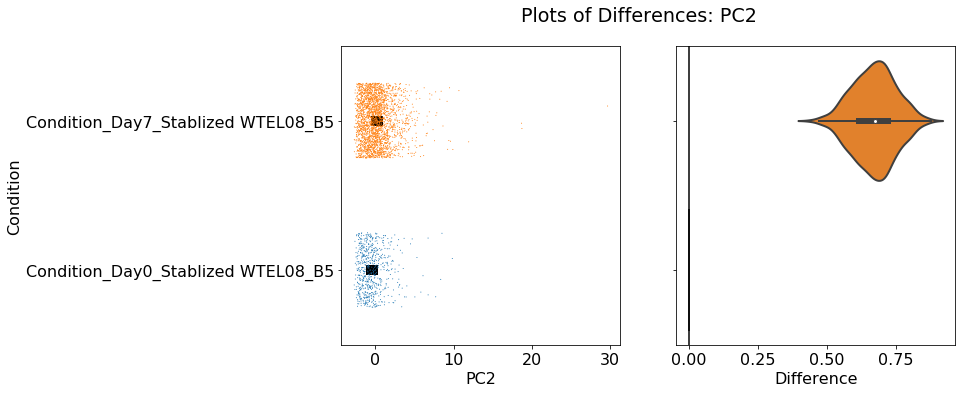

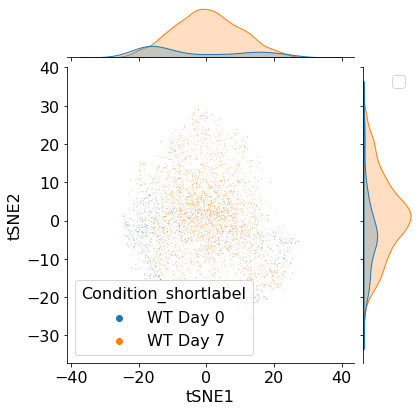

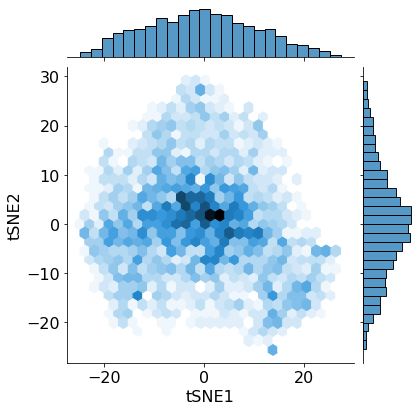

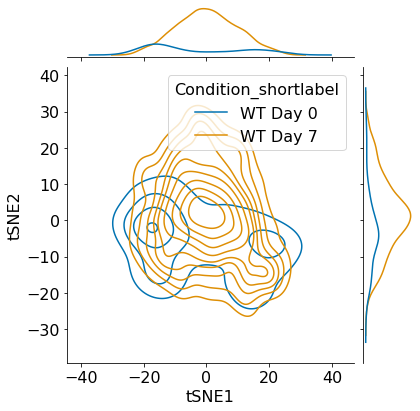

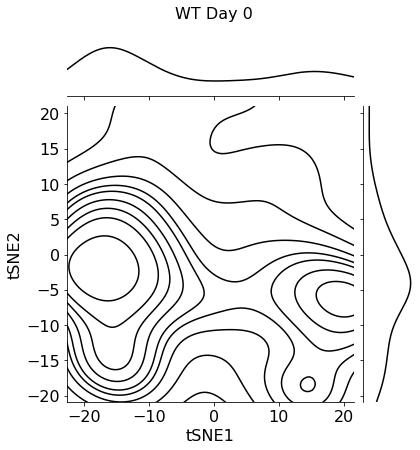

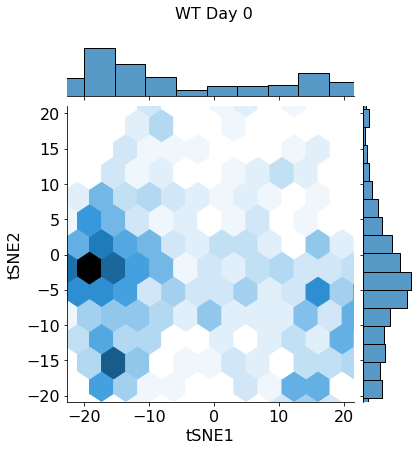

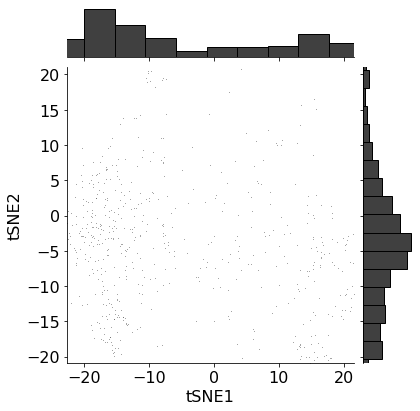

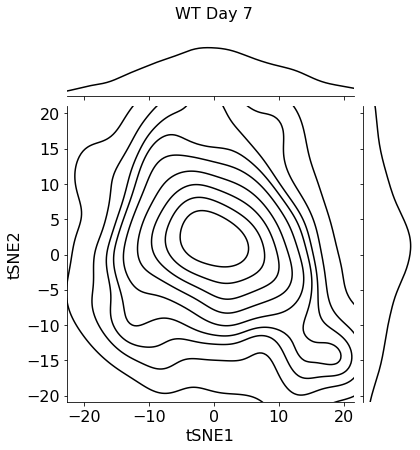

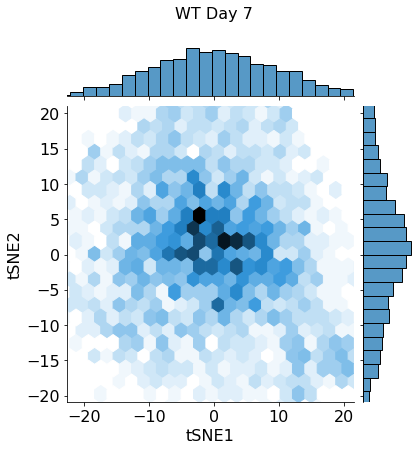

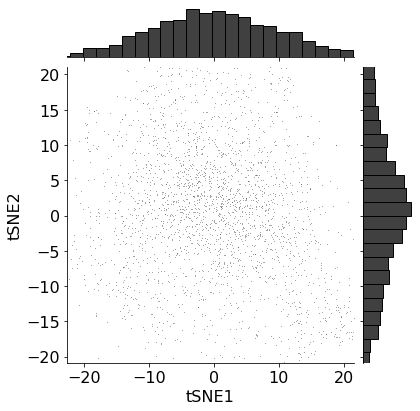

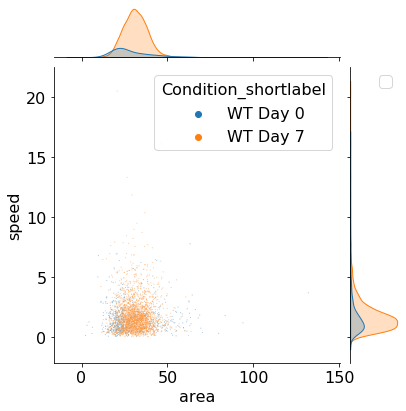

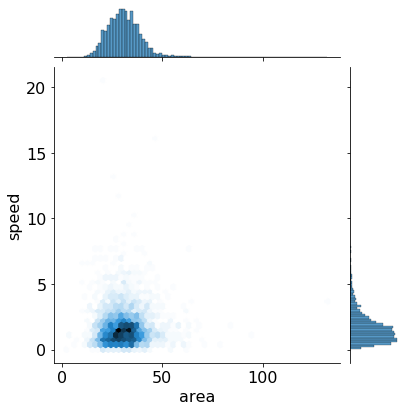

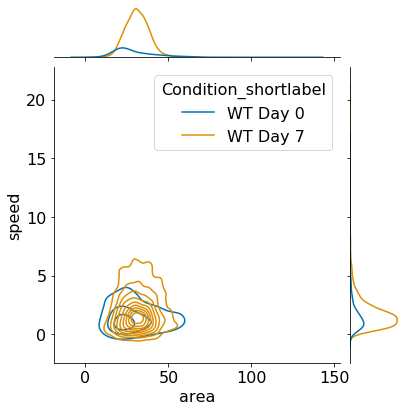

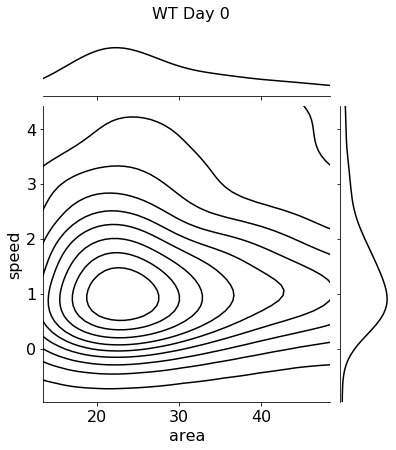

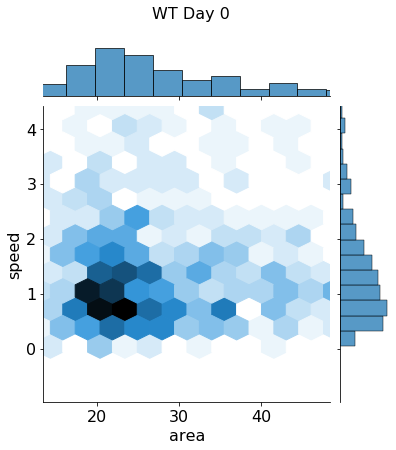

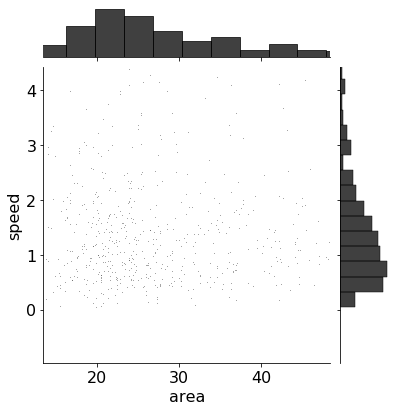

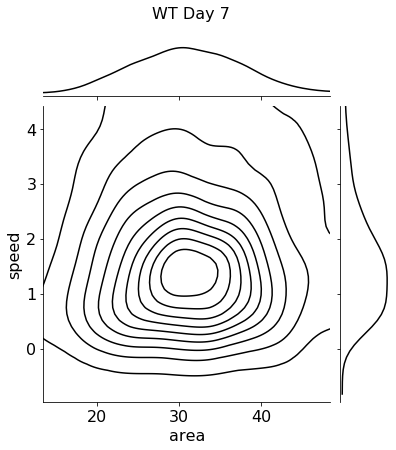

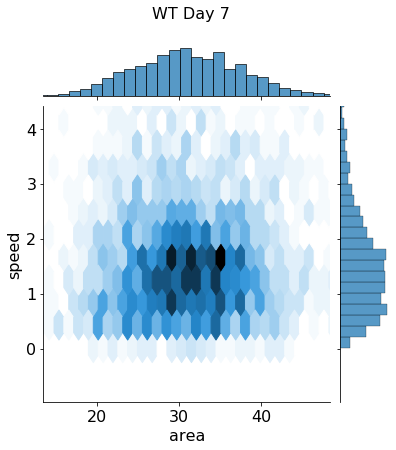

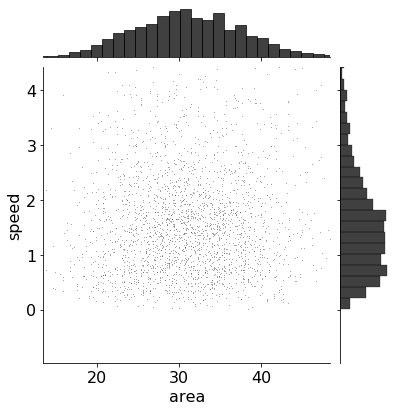

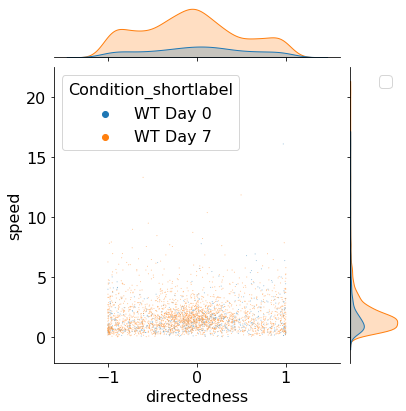

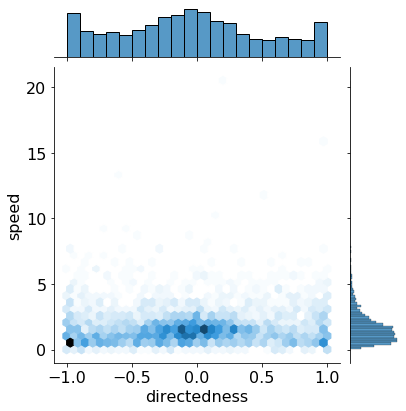

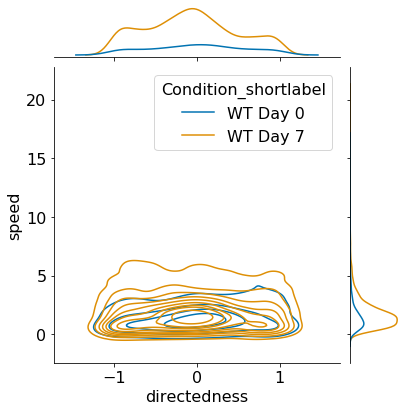

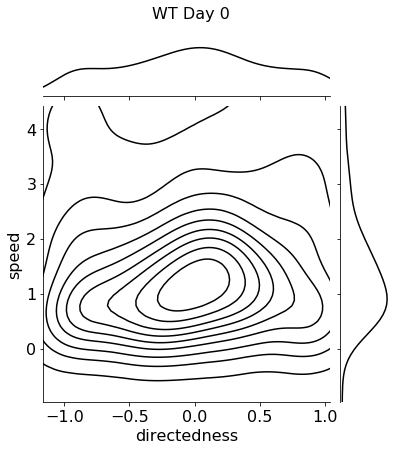

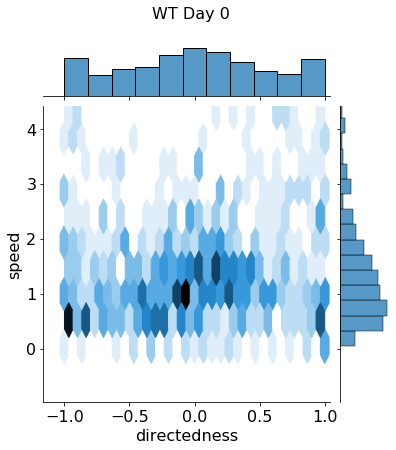

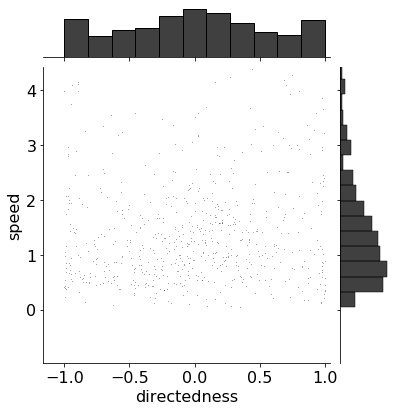

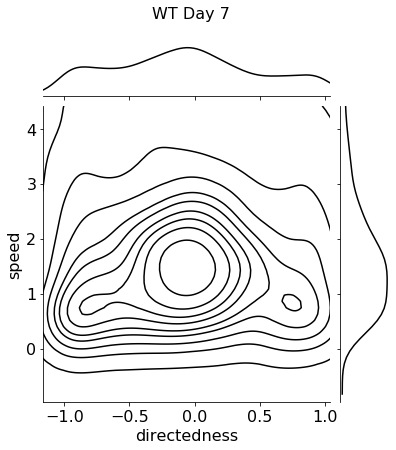

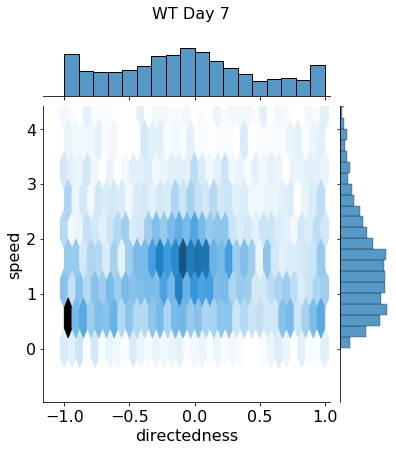

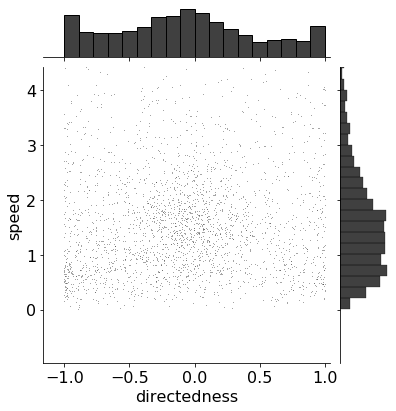

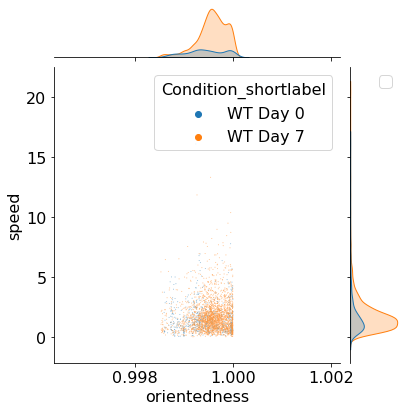

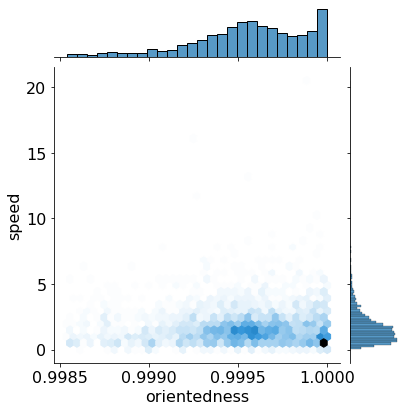

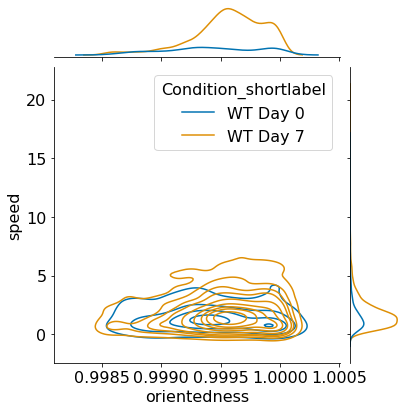

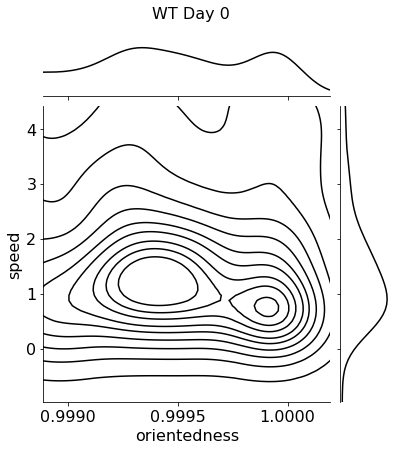

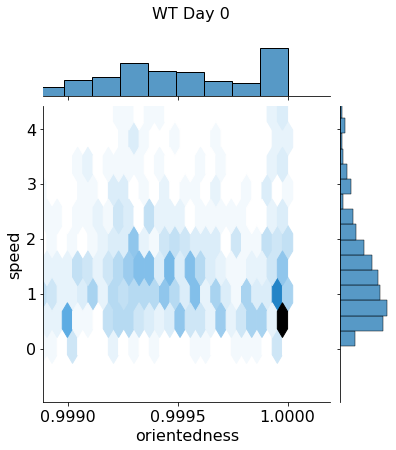

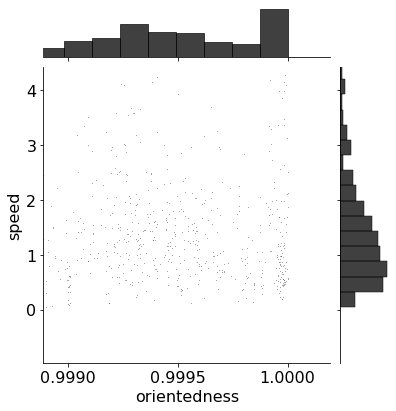

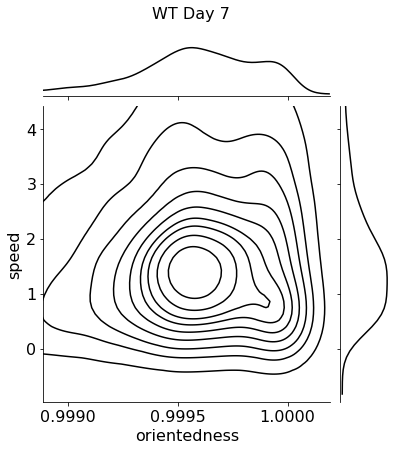

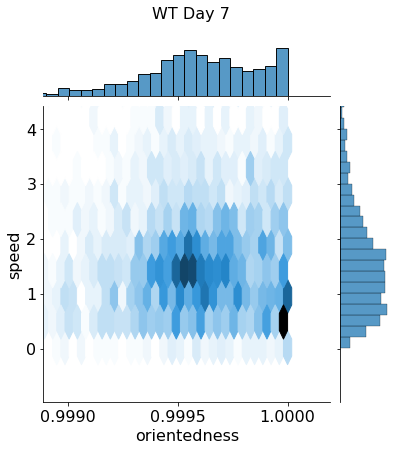

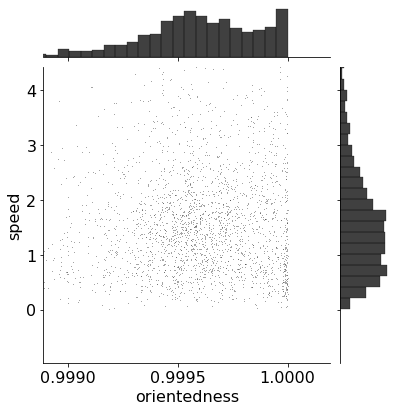

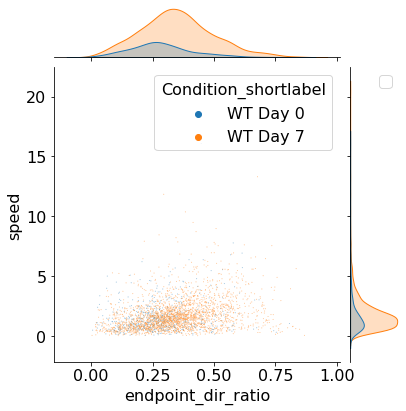

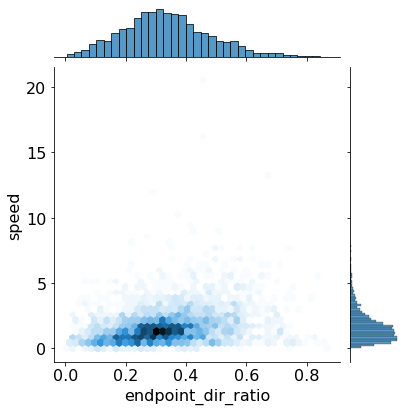

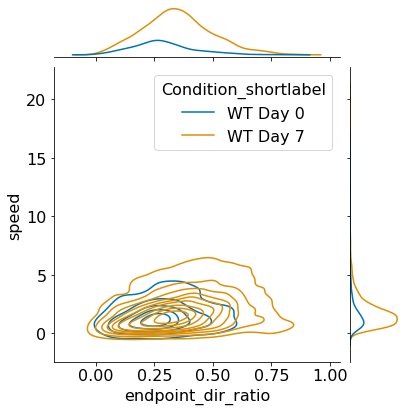

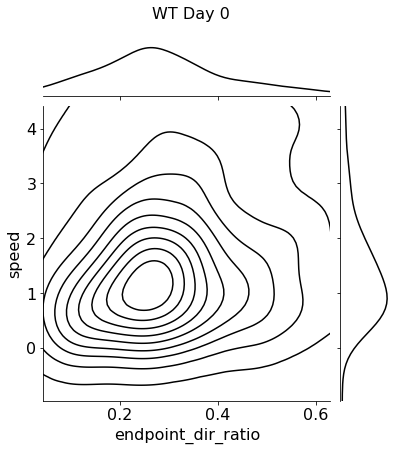

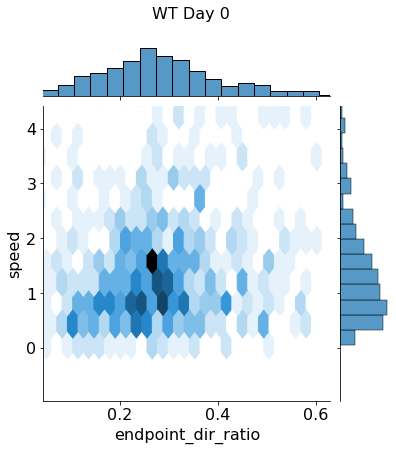

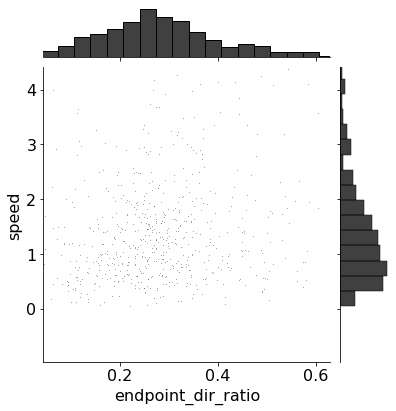

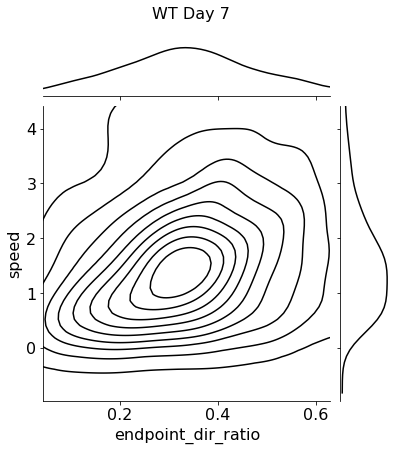

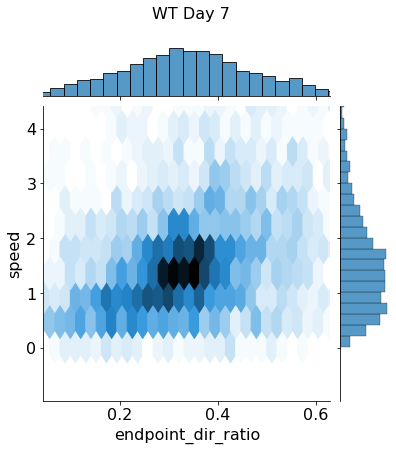

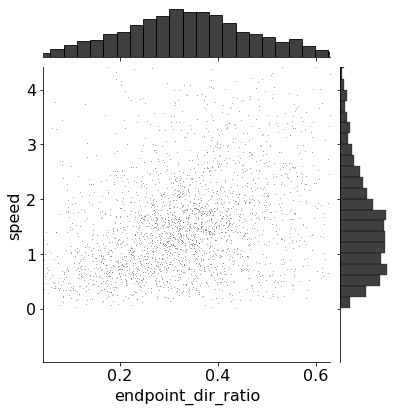

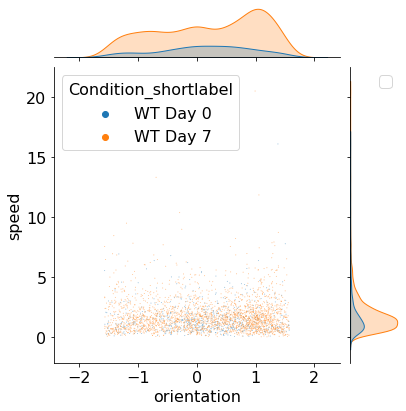

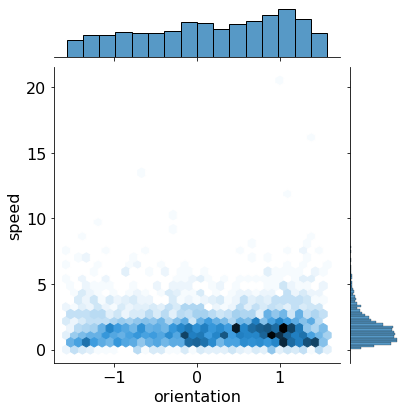

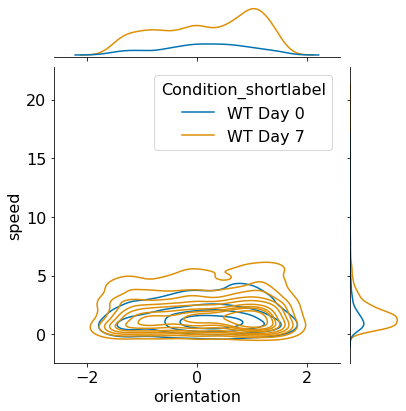

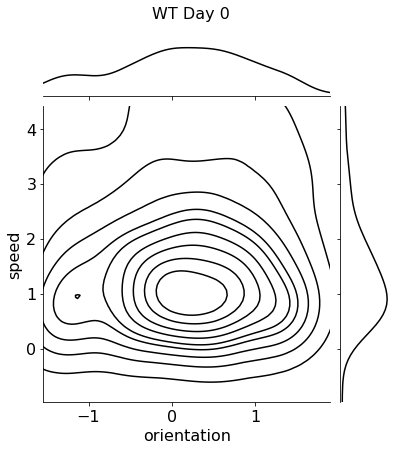

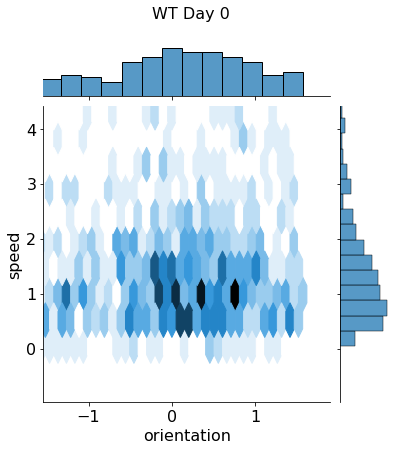

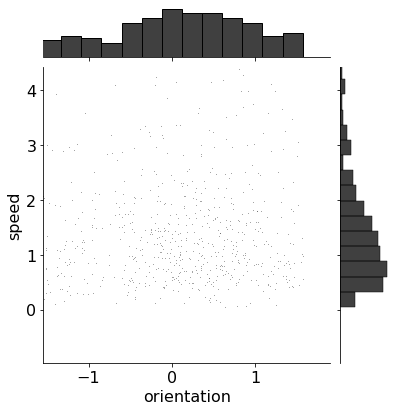

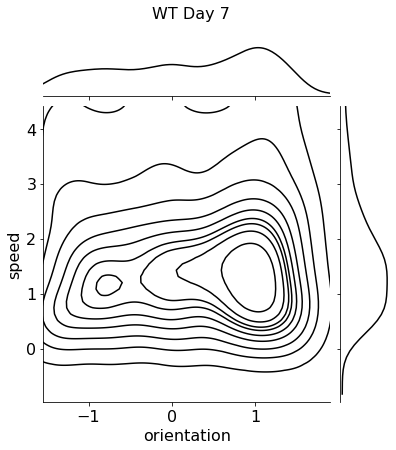

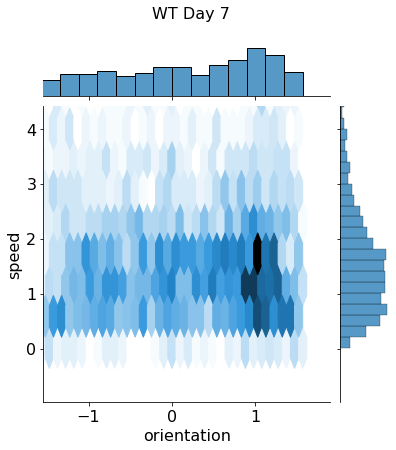

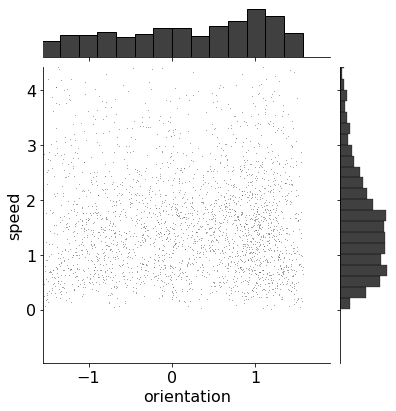

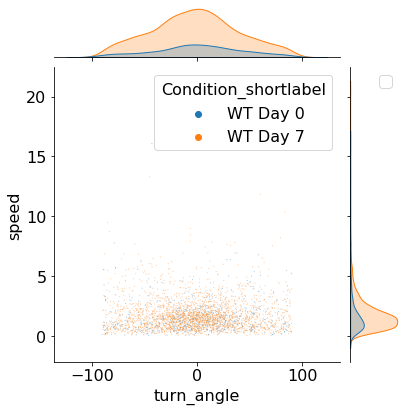

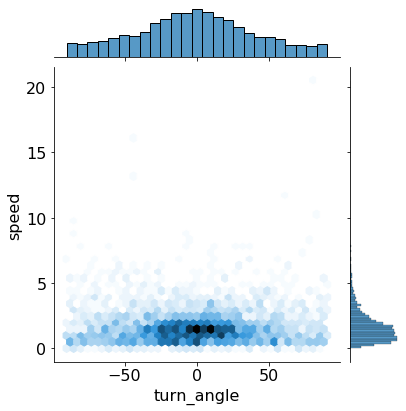

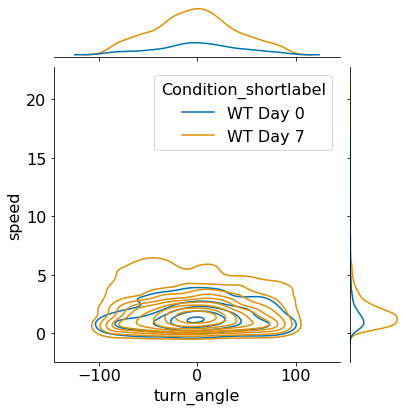

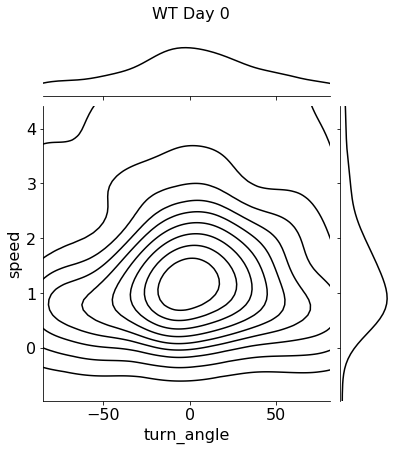

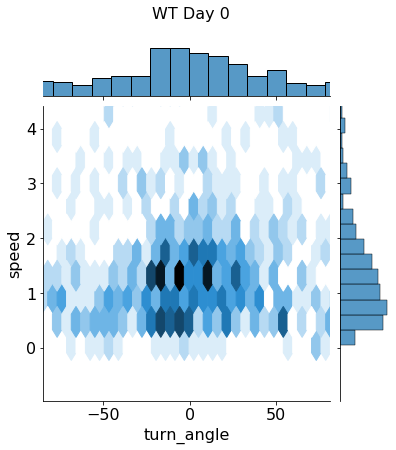

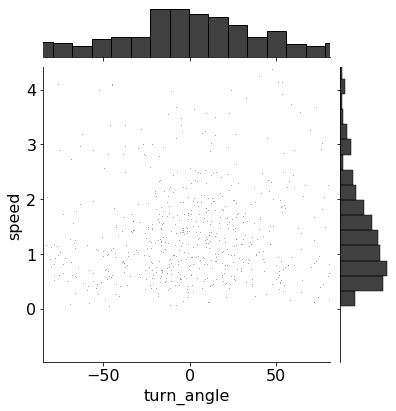

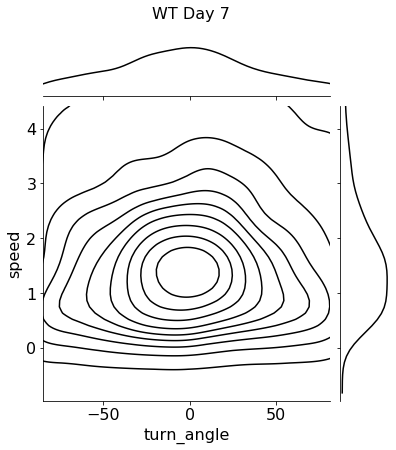

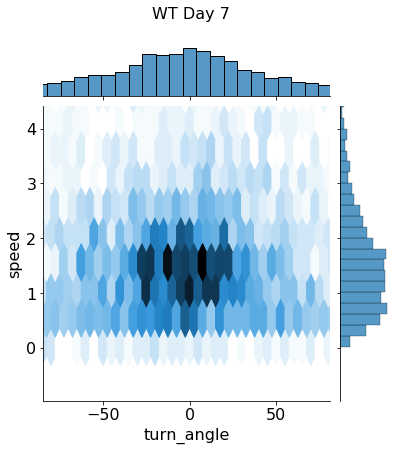

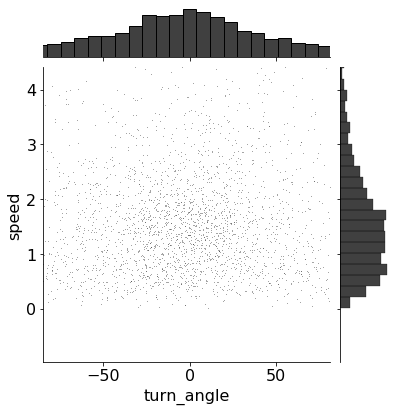

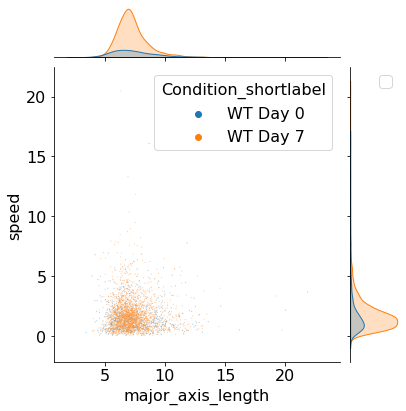

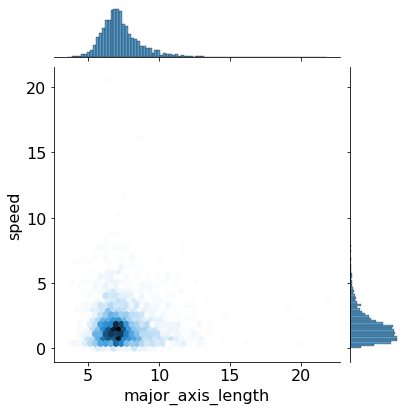

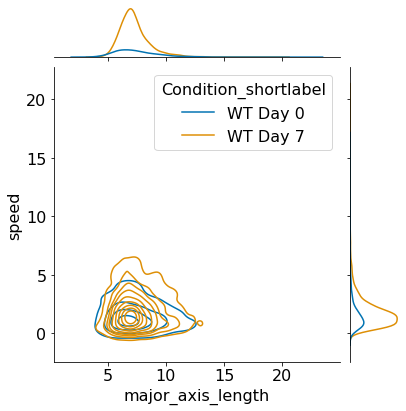

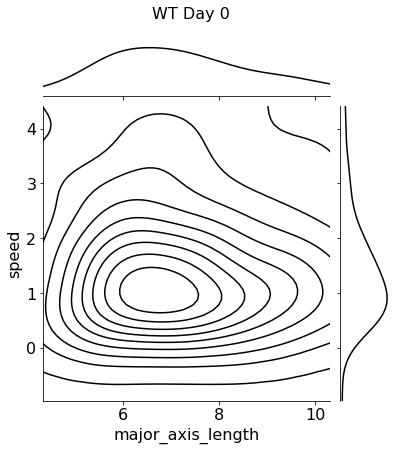

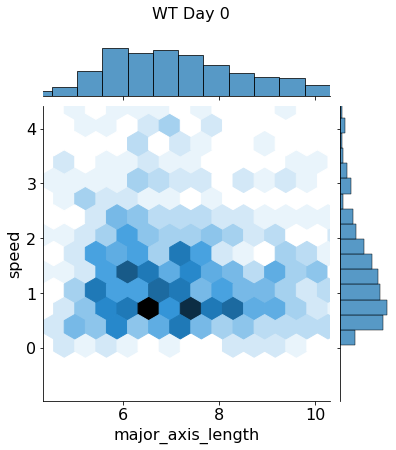

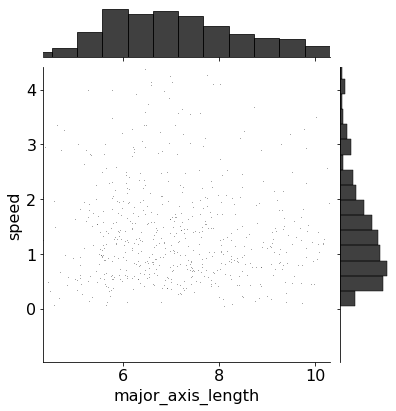

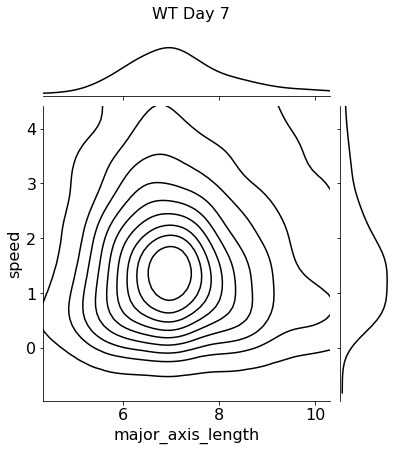

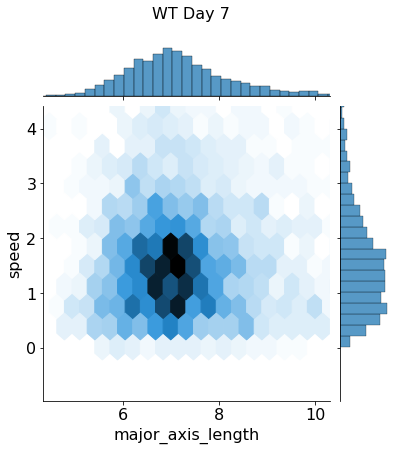

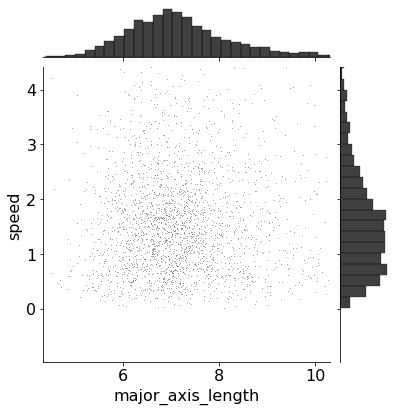

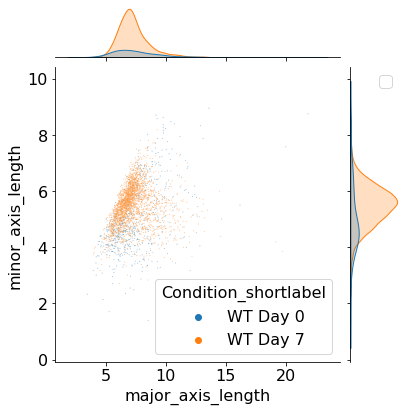

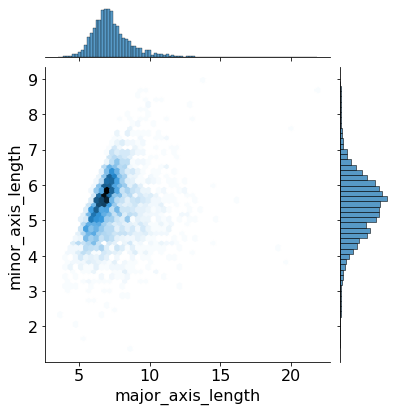

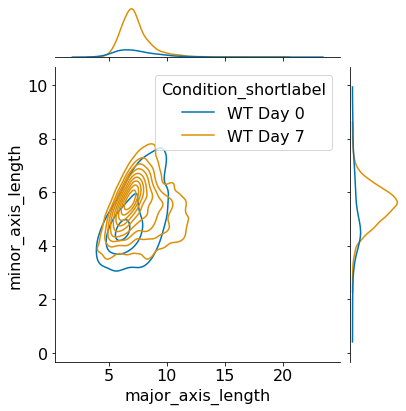

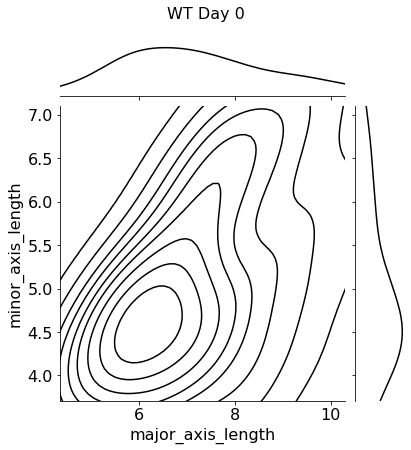

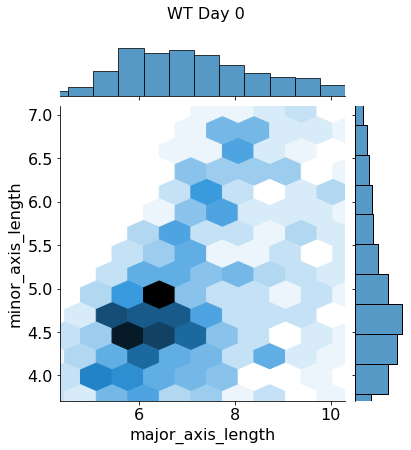

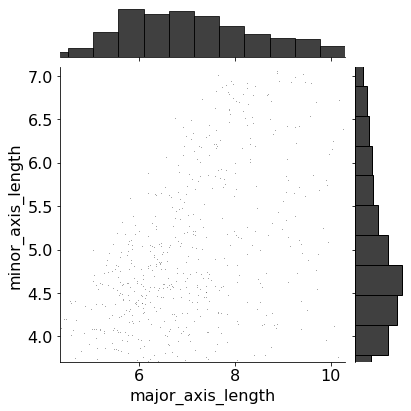

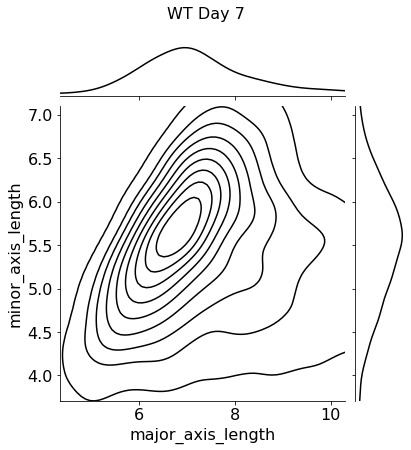

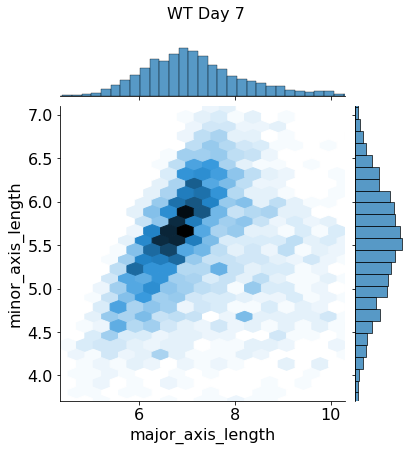

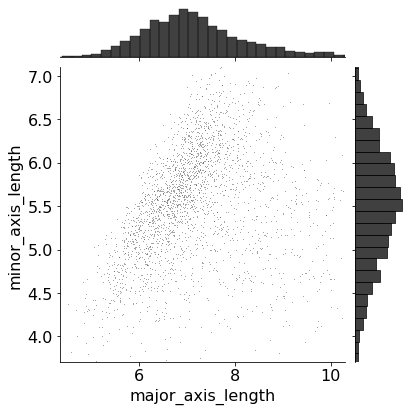

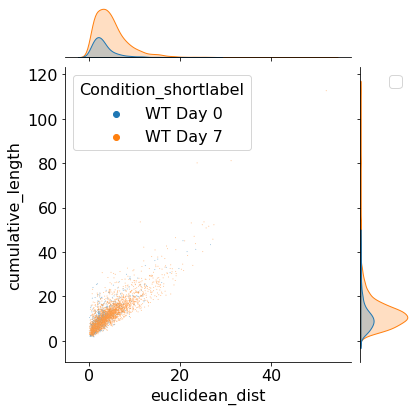

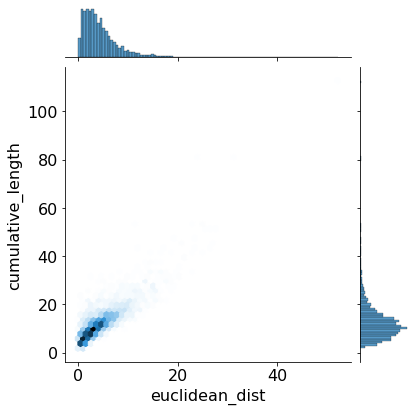

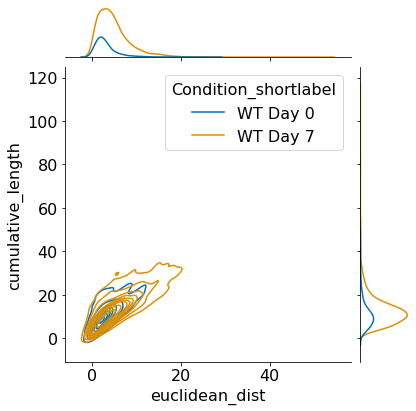

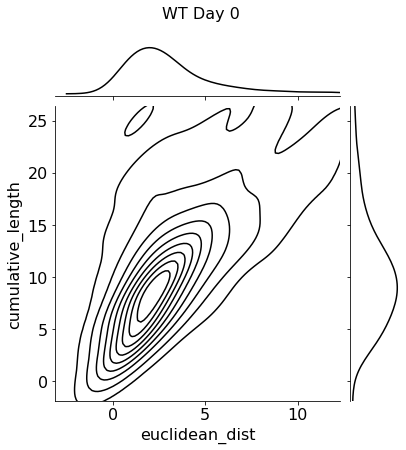

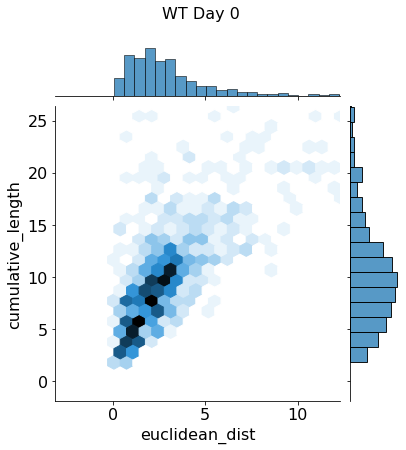

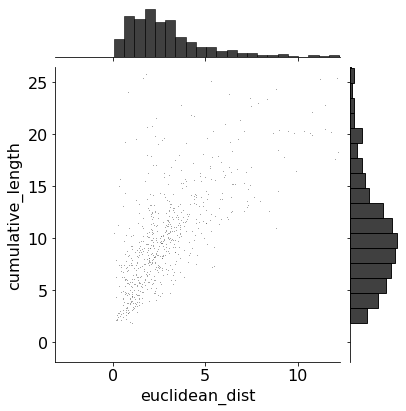

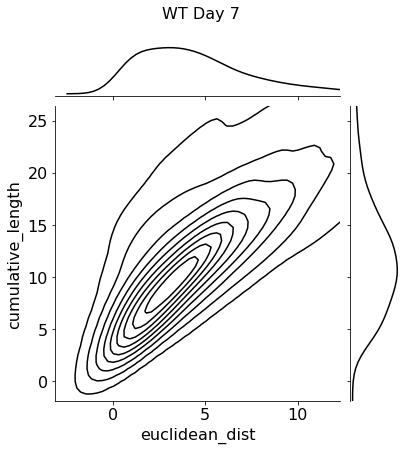

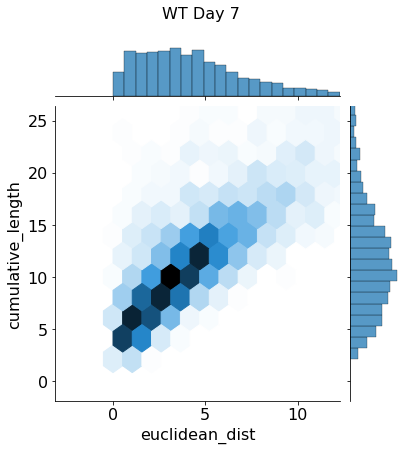

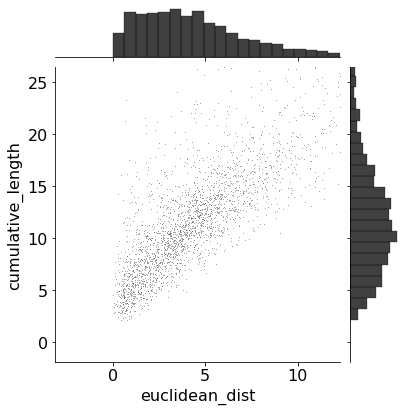

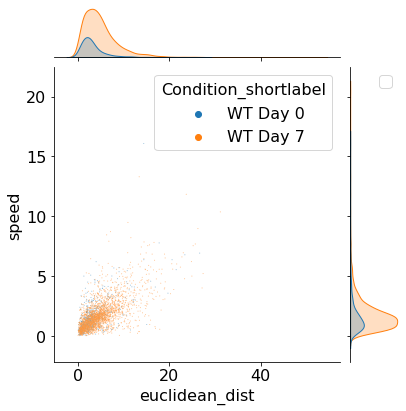

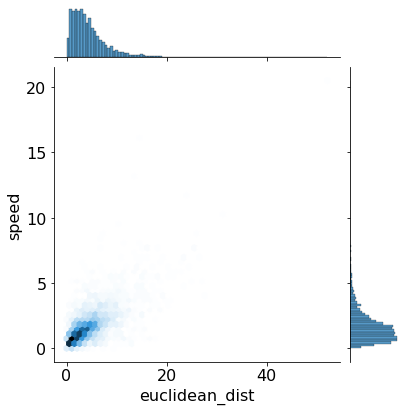

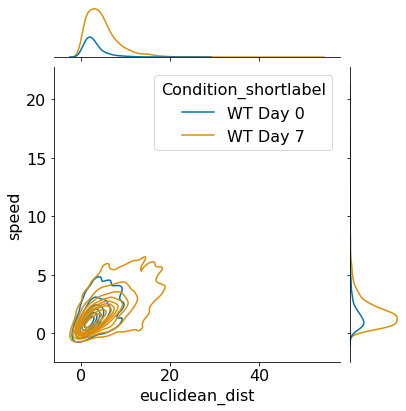

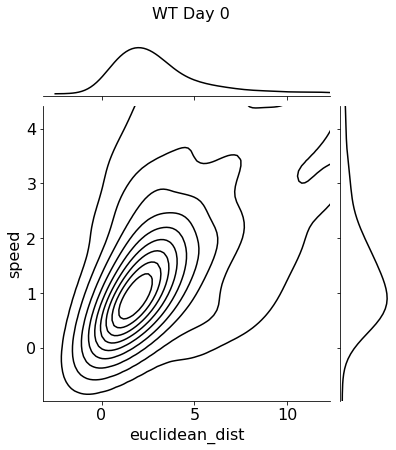

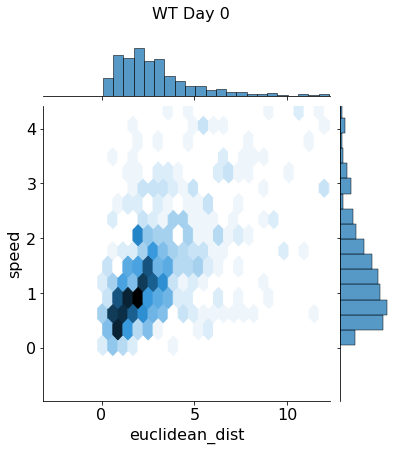

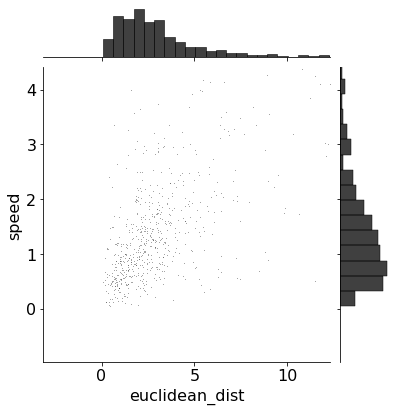

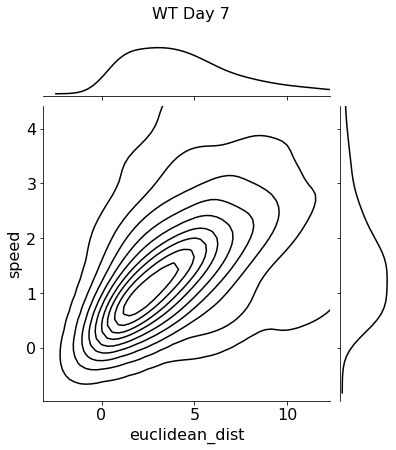

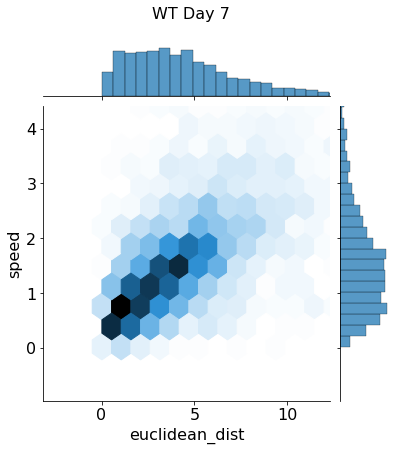

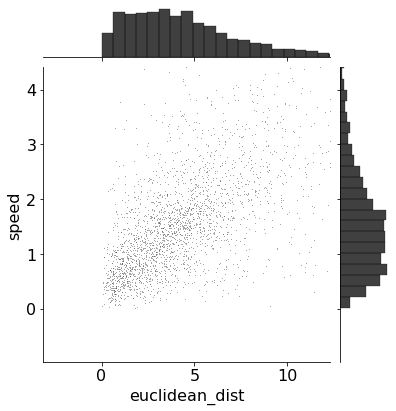

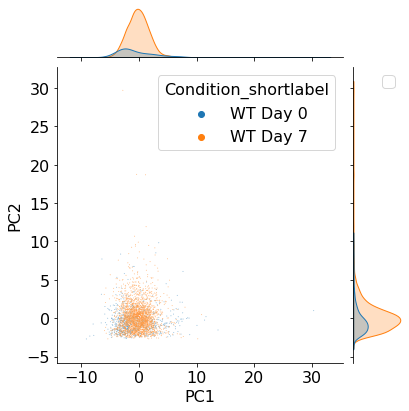

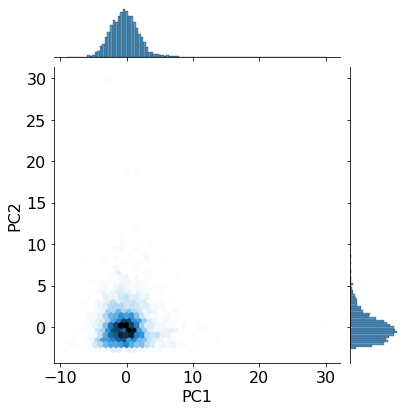

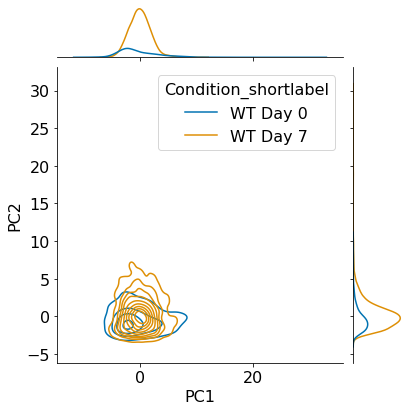

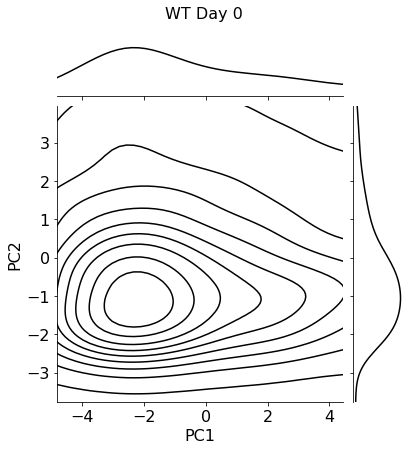

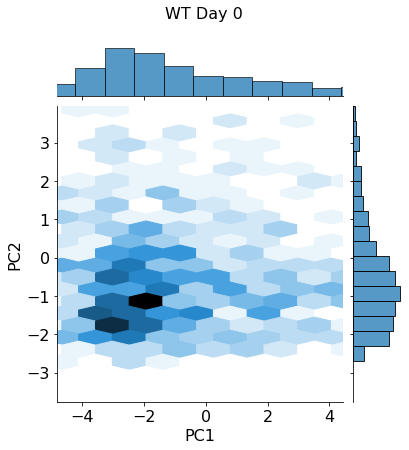

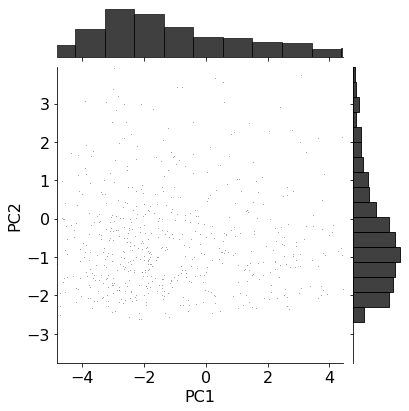

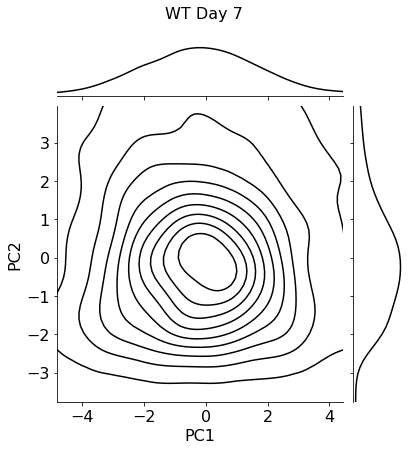

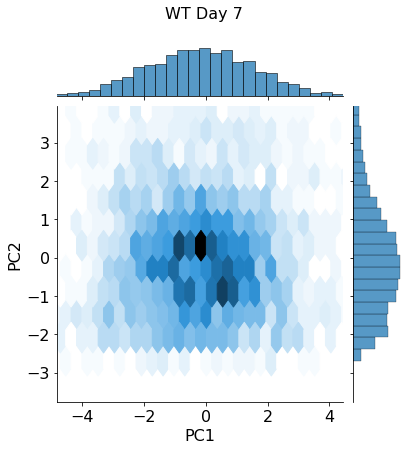

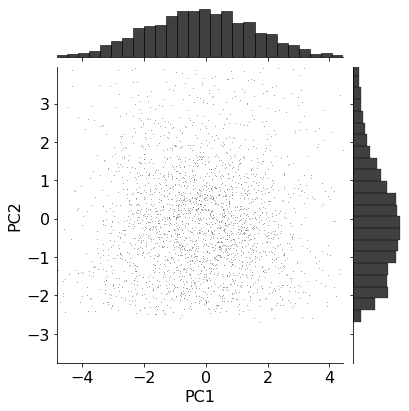

In [2]:
#Minimal pipelines:
comb_df = cp.combine_dataframes(cp.populate_experiment_list())
comb_df = cp.measurement_pipeline(comb_df)
comb_df, filt_counts = cp.apply_filters(comb_df)
dr_df = cp.dr_pipeline(comb_df, dr_factors=cp.DR_FACTORS) 
cp.comparative_visualization_pipeline(dr_df)

lab_dr_df = cp.cluster_analysis_pipeline(dr_df,cp.CLUSTER_BY)
lab_dr_df, traj_list, cluster_lst = cp.trajectory_clustering_pipeline(lab_dr_df, traj_factor=cp.CLUSTER_BY, dist_metric='hausdorff', filename_out='std_dr_df_traj')
cp.cluster_switching_pipeline(lab_dr_df)